In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import netCDF4 as nc
import os
import scipy.io as sio
from scipy import interpolate, signal
from pyproj import Proj,transform
import sys
sys.path.append('/ocean/ssahu/CANYONS/wcvi/grid/')
from bathy_common import *
from matplotlib import path
from salishsea_tools import viz_tools
from netCDF4 import Dataset
import xarray as xr
from salishsea_tools import nc_tools
import scipy.io as sio
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import cmocean as cmo
import matplotlib.gridspec as gridspec
%matplotlib inline
from scipy.io import loadmat
from scipy.interpolate import griddata
from dateutil.parser import parse
from salishsea_tools import geo_tools, viz_tools, tidetools, nc_tools

/home/ssahu/anaconda3/lib/python3.5/site-packages/xarray/conventions.py:9: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


In [3]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

Z = bathy.variables['Bathymetry'][:]

zlevels = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/CDF_COMB_COMPRESSED/NEP036-N30_IN_20140915_00001440_grid_T.nc').variables['deptht']


# grid = nc.Dataset('/ocean/ssahu/CANYONS/wcvi/grid/coordinates_NEMO/coordinates_westcoast_seagrid_high_resolution_truncated_wider_west_bdy.nc')


lon = bathy['nav_lon'][...]
lat = bathy['nav_lat'][...]

z0 = np.ma.masked_values(Z, 0)

y_wcvi_slice = np.array(np.arange(250,350))
x_wcvi_slice = np.array(np.arange(550,650))

In [4]:
def tem_sal_timeseries_at_WCVI_locations(grid_scalar):#, j, i):
    
#     temp = grid_scalar.variables['votemper'][0,:, j, i]
#     sal = grid_scalar.variables['vosaline'][0,:, j, i]
    temp = grid_scalar.variables['votemper'][0,:, :, :]
    sal = grid_scalar.variables['vosaline'][0,:, :, :]
    
    scalar_ts = namedtuple('scalar_ts', 'temp, sal')

    return scalar_ts(temp, sal)

In [5]:
from __future__ import division
import glob
import os
import fnmatch
from collections import namedtuple, OrderedDict
# from datetime import (
#     datetime,
#     timedelta,
# )
# from resource import getrlimit, RLIMIT_NOFILE
import os

# import arrow
# import netCDF4 as nc
# import pandas as pd
# import numpy as np

# import warnings

# from salishsea_tools import hg_commands as hg

# temp_july = np.empty((31,50,y_wcvi_slice.shape[0],x_wcvi_slice.shape[0]))
# sal_july = np.empty((31,50,y_wcvi_slice.shape[0],x_wcvi_slice.shape[0]))

temp_aug = np.empty((31,50,Z.shape[0],Z.shape[1]))
sal_aug = np.empty((31,50,Z.shape[0],Z.shape[1]))

i = 0
for file in sorted(glob.glob('/data/mdunphy/NEP036-N30-OUT/CDF_COMB_COMPRESSED/NEP036-N30_IN_201508*grid_T.nc')):
#     if fnmatch.fnmatch(file, '*_orig.nc') == False:
#         if fnmatch.fnmatch(file, '*ops_y2015m12d15.nc') == False:
        
#     if file != 'results/forcing/atmospheric/GEM2.5/operational/ops_y2015m04d03_orig.nc':
#     scalar_ts = tem_sal_timeseries_at_WCVI_locations(nc.Dataset(file), y_wcvi_slice,x_wcvi_slice)
    scalar_ts = tem_sal_timeseries_at_WCVI_locations(nc.Dataset(file))
#             uwind_es = np.append(uwind_es , wind_ts_es[0])
    temp_aug[i,...] = scalar_ts[0]
    sal_aug[i,...] = scalar_ts[1]
    i = i+1
#     else:
#         continue


In [6]:
from __future__ import division
import glob
import os
import fnmatch
from collections import namedtuple, OrderedDict
# from datetime import (
#     datetime,
#     timedelta,
# )
# from resource import getrlimit, RLIMIT_NOFILE
import os

# import arrow
# import netCDF4 as nc
# import pandas as pd
# import numpy as np

# import warnings

# from salishsea_tools import hg_commands as hg

# temp_july = np.empty((31,50,y_wcvi_slice.shape[0],x_wcvi_slice.shape[0]))
# sal_july = np.empty((31,50,y_wcvi_slice.shape[0],x_wcvi_slice.shape[0]))

temp_july = np.empty((31,50,Z.shape[0],Z.shape[1]))
sal_july = np.empty((31,50,Z.shape[0],Z.shape[1]))

i = 0
for file in sorted(glob.glob('/data/mdunphy/NEP036-N30-OUT/CDF_COMB_COMPRESSED/NEP036-N30_IN_201507*grid_T.nc')):
#     if fnmatch.fnmatch(file, '*_orig.nc') == False:
#         if fnmatch.fnmatch(file, '*ops_y2015m12d15.nc') == False:
        
#     if file != 'results/forcing/atmospheric/GEM2.5/operational/ops_y2015m04d03_orig.nc':
#     scalar_ts = tem_sal_timeseries_at_WCVI_locations(nc.Dataset(file), y_wcvi_slice,x_wcvi_slice)
    scalar_ts = tem_sal_timeseries_at_WCVI_locations(nc.Dataset(file))
#             uwind_es = np.append(uwind_es , wind_ts_es[0])
    temp_july[i,...] = scalar_ts[0]
    sal_july[i,...] = scalar_ts[1]
    i = i+1
#     else:
#         continue


/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


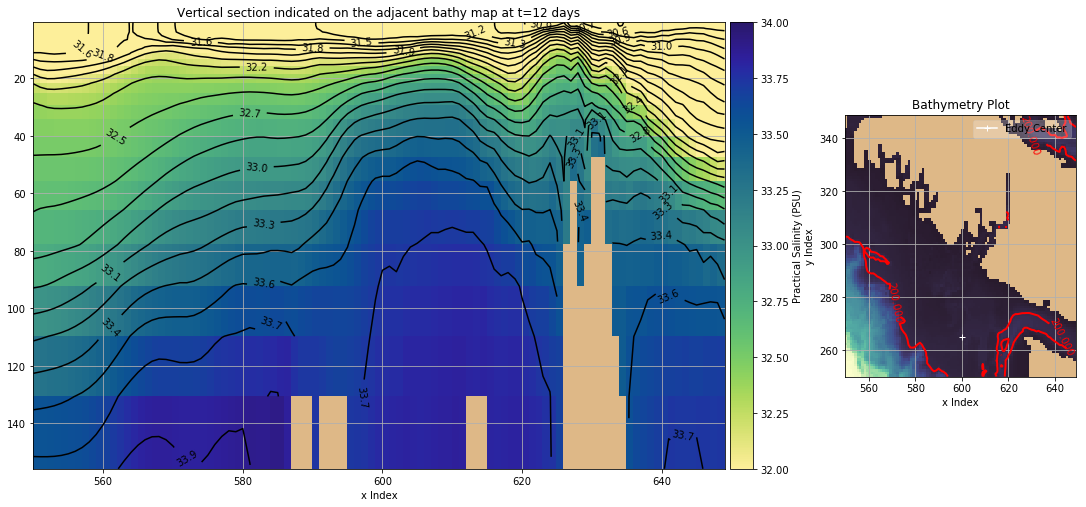

In [7]:
# Set up the figure and axes
fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(16, 8))
land_colour = 'burlywood'
for ax in (axl, axr):
    ax.set_axis_bgcolor(land_colour)
axl.set_position((0.125, 0.125, 0.6, 0.775))
axcb.set_position((0.73, 0.125, 0.02, 0.775))
axr.set_position((0.83, 0.125, 0.2, 0.775))

# Plot thalweg points on bathymetry map
viz_tools.set_aspect(axr)
cmap = plt.get_cmap(cmo.cm.deep_r)
cmap.set_bad(land_colour)
# bathy = bathymetry
# x_slice = np.arange(bathy.shape[1])
# y_slice = np.arange(bathy.shape[0])
axr.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[250:350,550:650], cmap=cmap, vmin=0)
axr.plot(
    600, 265,
    linestyle='-', marker='+', color='white',
    label='Eddy Center',
)
legend = axr.legend(loc='best', fancybox=True, framealpha=0.25)
axr.set_title('Bathymetry Plot')
axr.set_xlabel('x Index')
axr.set_ylabel('y Index')
CS = axr.contour(x_wcvi_slice,y_wcvi_slice,Z[250:350,550:650], levels = [200],
                 colors=('red',),linestyles=('-',),linewidths=(2,))


axr.clabel(CS)
axr.grid()

# Plot 24h average salinity at all depths along thalweg line
t = 12 
cmap = plt.get_cmap(cmo.cm.haline_r)
cmap.set_bad(land_colour)
sal_0 = sal_aug[t, :25, :,:]
sal_tzyx = np.ma.masked_values(sal_0, 0)
x, z = np.meshgrid(x_wcvi_slice, zlevels[:25])
mesh = axl.pcolormesh(x_wcvi_slice, zlevels[:25], sal_tzyx[:25,265,x_wcvi_slice], cmap=cmap, vmin=32, vmax=34)
cbar = plt.colorbar(mesh, cax=axcb)
cbar.set_label('Practical Salinity (PSU)')
clines = axl.contour(x_wcvi_slice, zlevels[:25], sal_tzyx[:25,265,x_wcvi_slice], np.arange(30, 34, 0.15), colors='black')
axl.clabel(clines, fmt='%1.1f', inline=True)
axl.invert_yaxis()
axl.set_xlabel('x Index')
# axl.set_ylabel('{0.long_name} [{0.units}]'.format(zlevels))
axl.grid()
axl.set_title('Vertical section indicated on the adjacent bathy map at t={0} days'.format(t))

/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


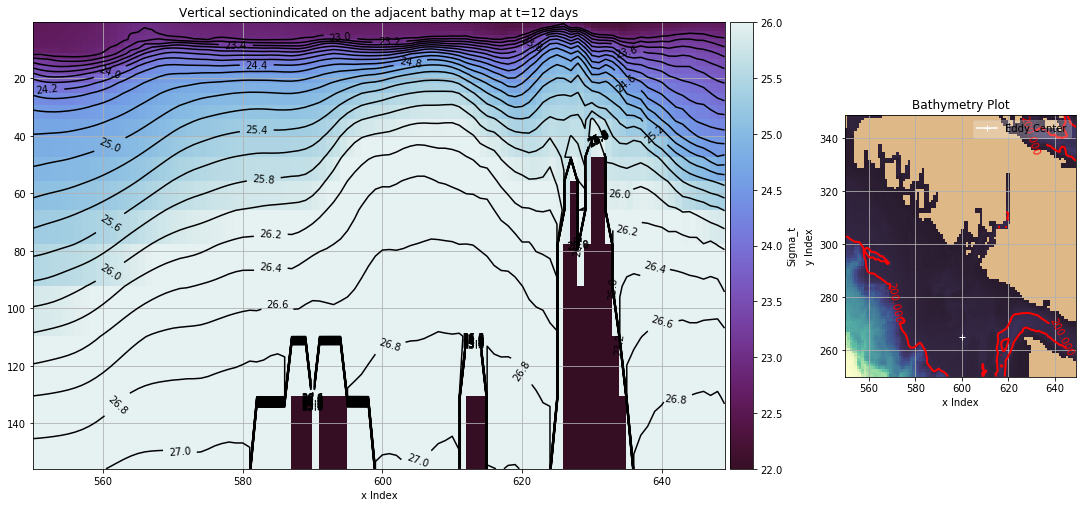

In [8]:
import gsw



# Set up the figure and axes
fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(16, 8))
land_colour = 'burlywood'
for ax in (axl, axr):
    ax.set_axis_bgcolor(land_colour)
axl.set_position((0.125, 0.125, 0.6, 0.775))
axcb.set_position((0.73, 0.125, 0.02, 0.775))
axr.set_position((0.83, 0.125, 0.2, 0.775))

# Plot thalweg points on bathymetry map
viz_tools.set_aspect(axr)
cmap = plt.get_cmap(cmo.cm.deep_r)
cmap.set_bad(land_colour)
# bathy = bathymetry
# x_slice = np.arange(bathy.shape[1])
# y_slice = np.arange(bathy.shape[0])
axr.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[250:350,550:650], cmap=cmap, vmin=0)
axr.plot(
    600, 265,
    linestyle='-', marker='+', color='white',
    label='Eddy Center',
)
legend = axr.legend(loc='best', fancybox=True, framealpha=0.25)
axr.set_title('Bathymetry Plot')
axr.set_xlabel('x Index')
axr.set_ylabel('y Index')
CS = axr.contour(x_wcvi_slice,y_wcvi_slice,Z[250:350,550:650], levels = [200],
                 colors=('red',),linestyles=('-',),linewidths=(2,))


axr.clabel(CS)
axr.grid()

# Plot 24h average salinity at all depths along thalweg line
t = 12 
cmap = plt.get_cmap(cmo.cm.dense_r)
cmap.set_bad(land_colour)
temp_0 = temp_aug[t, :25, :,:]
temp_tzyx = np.ma.masked_values(temp_0, 0)

Z_loc = zlevels[:25]
lat_loc = lat[y_wcvi_slice,x_wcvi_slice]
lon_loc = lon[y_wcvi_slice,x_wcvi_slice]

pressure_loc = gsw.p_from_z(-Z_loc,np.mean(lat_loc))
rho_loc = np.empty_like(sal_0)
for i in np.arange(25):
    rho_loc[i] = gsw.density.rho(sal_0[i,...], temp_0[i,...], pressure_loc[i]) -1000

    
rho_tzyx = np.ma.masked_values(rho_loc, 0)    
x, z = np.meshgrid(x_wcvi_slice, zlevels[:25])
mesh = axl.pcolormesh(x_wcvi_slice, zlevels[:25], rho_tzyx[:25,265,x_wcvi_slice], cmap=cmap, vmin=22, vmax=26)
cbar = plt.colorbar(mesh, cax=axcb)
cbar.set_label('Sigma_t')
clines = axl.contour(x_wcvi_slice, zlevels[:25], rho_tzyx[:25,265,x_wcvi_slice], np.arange(23, 30, 0.2), colors='black')
axl.clabel(clines, fmt='%1.1f', inline=True)
axl.invert_yaxis()
axl.set_xlabel('x Index')
# axl.set_ylabel('{0.long_name} [{0.units}]'.format(zlevels))
axl.grid()
axl.set_title('Vertical sectionindicated on the adjacent bathy map at t={0} days'.format(t))

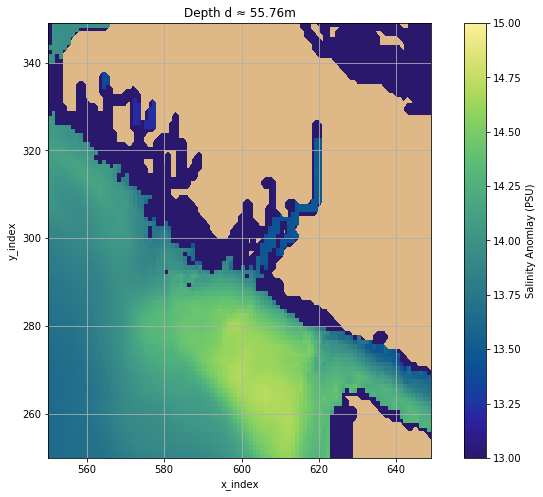

In [8]:
t = 12
level = 18



fig, ax = plt.subplots(1, 1, figsize=(12, 8))
viz_tools.set_aspect(ax)
# mesh = ax.pcolormesh(temp0)
cmap = plt.get_cmap(cmo.cm.haline)
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(x_wcvi_slice,y_wcvi_slice,sal_aug[t,level,250:350,550:650]- np.nanmean(sal_aug[t,level,...]), cmap=cmap, vmin = 13, vmax = 15)
# mesh = ax.pcolormesh(x_wcvi_slice,y_wcvi_slice,temp_july[0,0,250:350,550:650], cmap=cmap, vmin = 12, vmax = 15)
cbar = fig.colorbar(mesh)
cbar.set_label('Salinity Anomlay (PSU)')
viz_tools.plot_land_mask(ax, bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
ax.set_title("Depth d \u2248 {d:.2f}m".format(d=zlevels[level]))
ax.set_xlabel('x_index')
ax.set_ylabel('y_index')
ax.grid()

In [9]:
def U_timeseries_at_WCVI_locations(grid_U):
    u_vel = grid_U.variables['vozocrtx'][0,:, :, :]
    
    vector_u = namedtuple('vector_u', 'u_vel')

    return vector_u(u_vel)


def V_timeseries_at_WCVI_locations(grid_V):
    
    v_vel = grid_V.variables['vomecrty'][0,:, :, :]
    
    vector_v = namedtuple('vector_v', 'v_vel')

    return vector_v(v_vel)

In [10]:
from __future__ import division
import glob
import os
import fnmatch
from collections import namedtuple, OrderedDict
# from datetime import (
#     datetime,
#     timedelta,
# )
# from resource import getrlimit, RLIMIT_NOFILE
import os

# import arrow
# import netCDF4 as nc
# import pandas as pd
# import numpy as np

# import warnings

# from salishsea_tools import hg_commands as hg

# temp_july = np.empty((31,50,y_wcvi_slice.shape[0],x_wcvi_slice.shape[0]))
# sal_july = np.empty((31,50,y_wcvi_slice.shape[0],x_wcvi_slice.shape[0]))

u_aug = np.empty((31,50,Z.shape[0],Z.shape[1]))
v_aug = np.empty((31,50,Z.shape[0],Z.shape[1]))

i = 0
for file in sorted(glob.glob('/data/mdunphy/NEP036-N30-OUT/CDF_COMB_COMPRESSED/NEP036-N30_IN_201508*grid_U.nc')):
#     if fnmatch.fnmatch(file, '*_orig.nc') == False:
#         if fnmatch.fnmatch(file, '*ops_y2015m12d15.nc') == False:
        
#     if file != 'results/forcing/atmospheric/GEM2.5/operational/ops_y2015m04d03_orig.nc':
#     scalar_ts = tem_sal_timeseries_at_WCVI_locations(nc.Dataset(file), y_wcvi_slice,x_wcvi_slice)
    vector_u = U_timeseries_at_WCVI_locations(nc.Dataset(file))
#             uwind_es = np.append(uwind_es , wind_ts_es[0])
    u_aug[i,...] = vector_u[0]
    i = i+1
#     else:
#         continue




j = 0
for file in sorted(glob.glob('/data/mdunphy/NEP036-N30-OUT/CDF_COMB_COMPRESSED/NEP036-N30_IN_201508*grid_V.nc')):
#     if fnmatch.fnmatch(file, '*_orig.nc') == False:
#         if fnmatch.fnmatch(file, '*ops_y2015m12d15.nc') == False:
        
#     if file != 'results/forcing/atmospheric/GEM2.5/operational/ops_y2015m04d03_orig.nc':
#     scalar_ts = tem_sal_timeseries_at_WCVI_locations(nc.Dataset(file), y_wcvi_slice,x_wcvi_slice)
    vector_v = V_timeseries_at_WCVI_locations(nc.Dataset(file))
#             uwind_es = np.append(uwind_es , wind_ts_es[0])
    v_aug[j,...] = vector_v[0]
    j = j+1

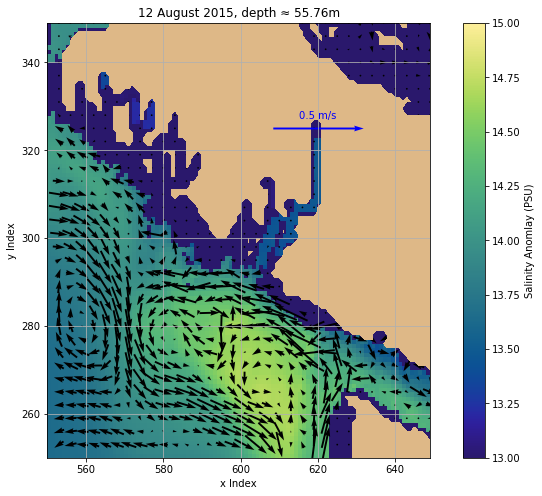

In [11]:
t = 12
level = 18


arrow_step = 3
y_slice_a = y_wcvi_slice[::arrow_step]
x_slice_a = x_wcvi_slice[::arrow_step]
cmap = plt.get_cmap(cmo.cm.haline)
cmap.set_bad('burlywood')



fig, ax = plt.subplots(1, 1, figsize=(12, 8))
viz_tools.set_aspect(ax)

mesh = ax.pcolormesh(x_wcvi_slice,y_wcvi_slice,sal_aug[t,level,250:350,550:650]- np.nanmean(sal_aug[t,level,...]), cmap=cmap, vmin = 13, vmax = 15)
# mesh = ax.pcolormesh(x_wcvi_slice,y_wcvi_slice,temp_july[0,0,250:350,550:650], cmap=cmap, vmin = 12, vmax = 15)
cbar = fig.colorbar(mesh)
cbar.set_label('Salinity Anomlay (PSU)')
viz_tools.plot_land_mask(ax, bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')

u_tzyx, v_tzyx = viz_tools.unstagger(u_aug[t,level,250:350,550:650], v_aug[t,level,250:350,550:650])
speeds = np.sqrt(np.square(u_tzyx) + np.square(v_tzyx))
quiver = ax.quiver(x_slice_a[1:], y_slice_a[1:], u_tzyx[::3,::3], v_tzyx[::3,::3] ,pivot='mid', cmap='Reds', width=0.005)
viz_tools.plot_land_mask(ax, bathy , xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')



ax.grid()
# Axes label and title
# Axes limits and grid
ax.set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
ax.set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
ax.set_xlabel('x Index')
ax.set_ylabel('y Index')
ax.set_title('{0} August 2015, depth \u2248 {d:.2f}{z.units}'.format(t, d=zlevels[level], z=zlevels))
ax.quiverkey(quiver, 620, 325, 0.5, '0.5 m/s', coordinates='data', color='blue', labelcolor='blue')

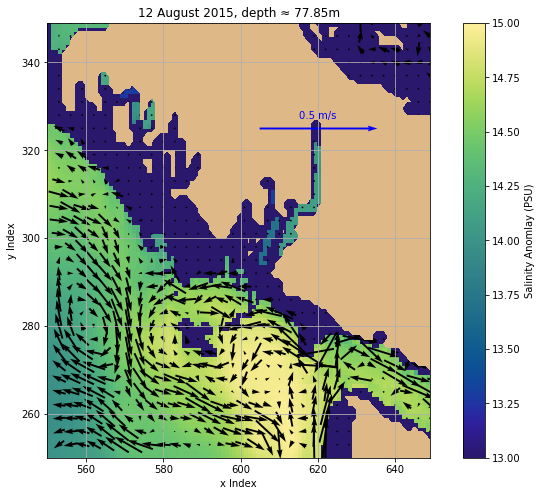

In [12]:
t = 12
level = 20


arrow_step = 3
y_slice_a = y_wcvi_slice[::arrow_step]
x_slice_a = x_wcvi_slice[::arrow_step]
cmap = plt.get_cmap(cmo.cm.haline)
cmap.set_bad('burlywood')



fig, ax = plt.subplots(1, 1, figsize=(12, 8))
viz_tools.set_aspect(ax)

mesh = ax.pcolormesh(x_wcvi_slice,y_wcvi_slice,sal_aug[t,level,250:350,550:650]- np.nanmean(sal_aug[t,level,...]), cmap=cmap, vmin = 13, vmax = 15)
# mesh = ax.pcolormesh(x_wcvi_slice,y_wcvi_slice,temp_july[0,0,250:350,550:650], cmap=cmap, vmin = 12, vmax = 15)
cbar = fig.colorbar(mesh)
cbar.set_label('Salinity Anomlay (PSU)')
viz_tools.plot_land_mask(ax, bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')

u_tzyx, v_tzyx = viz_tools.unstagger(u_aug[t,level,250:350,550:650], v_aug[t,level,250:350,550:650])
speeds = np.sqrt(np.square(u_tzyx) + np.square(v_tzyx))
quiver = ax.quiver(x_slice_a[1:], y_slice_a[1:], u_tzyx[::3,::3], v_tzyx[::3,::3] ,pivot='mid', cmap='Reds', width=0.005)
viz_tools.plot_land_mask(ax, bathy , xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')



ax.grid()
# Axes label and title
# Axes limits and grid
ax.set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
ax.set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
ax.set_xlabel('x Index')
ax.set_ylabel('y Index')
ax.set_title('{0} August 2015, depth \u2248 {d:.2f}{z.units}'.format(t, d=zlevels[level], z=zlevels))
ax.quiverkey(quiver, 620, 325, 0.5, '0.5 m/s', coordinates='data', color='blue', labelcolor='blue')

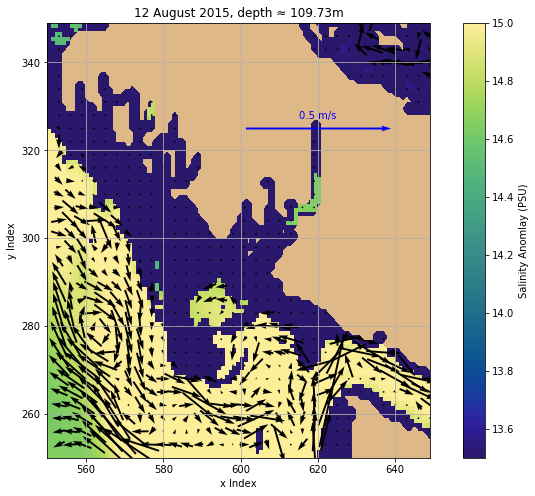

In [13]:
t = 12
level = 22


arrow_step = 3
y_slice_a = y_wcvi_slice[::arrow_step]
x_slice_a = x_wcvi_slice[::arrow_step]
cmap = plt.get_cmap(cmo.cm.haline)
cmap.set_bad('burlywood')



fig, ax = plt.subplots(1, 1, figsize=(12, 8))
viz_tools.set_aspect(ax)

mesh = ax.pcolormesh(x_wcvi_slice,y_wcvi_slice,sal_aug[t,level,250:350,550:650]- np.nanmean(sal_aug[t,level,...]), cmap=cmap, vmin = 13.5, vmax = 15)
# mesh = ax.pcolormesh(x_wcvi_slice,y_wcvi_slice,temp_july[0,0,250:350,550:650], cmap=cmap, vmin = 12, vmax = 15)
cbar = fig.colorbar(mesh)
cbar.set_label('Salinity Anomlay (PSU)')
viz_tools.plot_land_mask(ax, bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')

u_tzyx, v_tzyx = viz_tools.unstagger(u_aug[t,level,250:350,550:650], v_aug[t,level,250:350,550:650])
speeds = np.sqrt(np.square(u_tzyx) + np.square(v_tzyx))
quiver = ax.quiver(x_slice_a[1:], y_slice_a[1:], u_tzyx[::3,::3], v_tzyx[::3,::3] ,pivot='mid', cmap='Reds', width=0.005)
viz_tools.plot_land_mask(ax, bathy , xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')



ax.grid()
# Axes label and title
# Axes limits and grid
ax.set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
ax.set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
ax.set_xlabel('x Index')
ax.set_ylabel('y Index')
ax.set_title('{0} August 2015, depth \u2248 {d:.2f}{z.units}'.format(t, d=zlevels[level], z=zlevels))
ax.quiverkey(quiver, 620, 325, 0.5, '0.5 m/s', coordinates='data', color='blue', labelcolor='blue')

### Q) How good is the salinity anomaly of 14.9 in charactersising the pool in August ?

/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


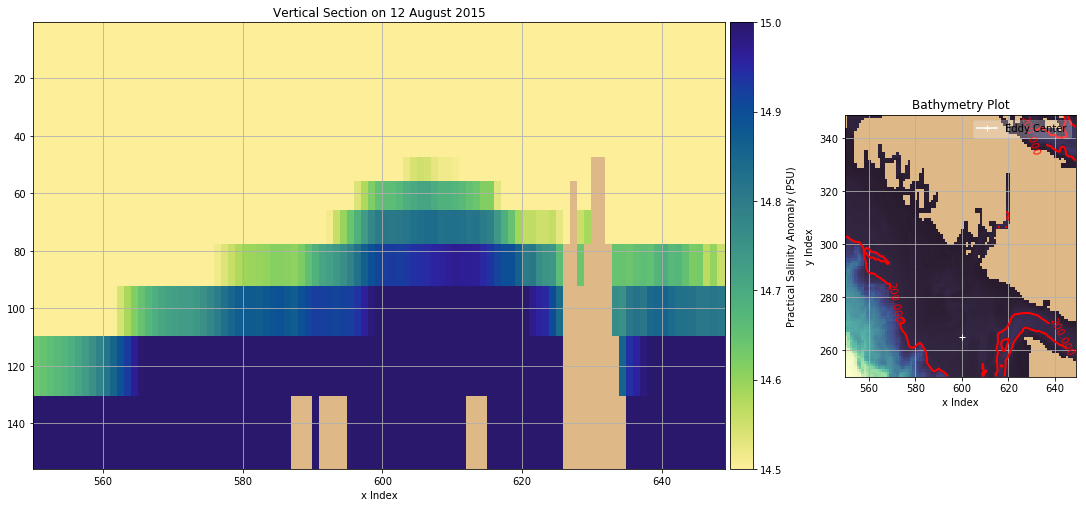

In [63]:
# Set up the figure and axes
fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(16, 8))
land_colour = 'burlywood'
for ax in (axl, axr):
    ax.set_axis_bgcolor(land_colour)
axl.set_position((0.125, 0.125, 0.6, 0.775))
axcb.set_position((0.73, 0.125, 0.02, 0.775))
axr.set_position((0.83, 0.125, 0.2, 0.775))



# Plot thalweg points on bathymetry map
viz_tools.set_aspect(axr)
cmap = plt.get_cmap(cmo.cm.deep_r)
cmap.set_bad(land_colour)
# bathy = bathymetry
# x_slice = np.arange(bathy.shape[1])
# y_slice = np.arange(bathy.shape[0])
axr.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[250:350,550:650], cmap=cmap, vmin=0)
axr.plot(
    600, 265,
    linestyle='-', marker='+', color='white',
    label='Eddy Center',
)
legend = axr.legend(loc='best', fancybox=True, framealpha=0.25)
axr.set_title('Bathymetry Plot')
axr.set_xlabel('x Index')
axr.set_ylabel('y Index')
CS = axr.contour(x_wcvi_slice,y_wcvi_slice,Z[250:350,550:650], levels = [200],
                 colors=('red',),linestyles=('-',),linewidths=(2,))


axr.clabel(CS)
axr.grid()

# Plot 24h average salinity at all depths along thalweg line
t = 12 
cmap = plt.get_cmap(cmo.cm.haline_r)
cmap.set_bad(land_colour)
sal_0 = sal_aug[t, :25, :,:]
sal_ano = np.empty_like(sal_0)
sal_0 = np.ma.masked_values(sal_0, 0)

for i in np.arange(sal_0.shape[0]):
    sal_ano[i,...] = sal_0[i,...] - np.mean(sal_aug[t,i,...])

sal_tzyx = np.ma.masked_values(sal_ano, 0)
x, z = np.meshgrid(x_wcvi_slice, zlevels[:25])
mesh = axl.pcolormesh(x_wcvi_slice, zlevels[:25], sal_tzyx[:25,265,x_wcvi_slice], cmap=cmap, vmin=14.5, vmax=15)
cbar = plt.colorbar(mesh, cax=axcb)
cbar.set_label('Practical Salinity Anomaly (PSU)')
clines = axl.contour(x_wcvi_slice, zlevels[:25], sal_tzyx[:25,265,x_wcvi_slice], np.arange(30, 33, 0.15), colors='black')
axl.clabel(clines, fmt='%1.1f', inline=True)
axl.invert_yaxis()
axl.set_xlabel('x Index')
# axl.set_ylabel('{0.long_name} [{0.units}]'.format(zlevels))
axl.grid()
axl.set_title('Vertical Section on {0} August 2015'.format(t))

/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


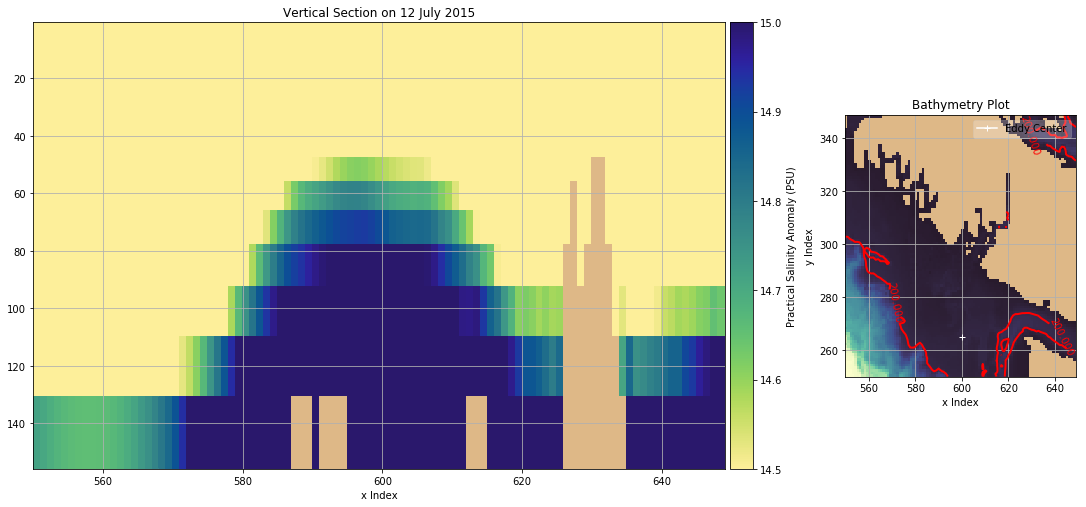

In [51]:
# Set up the figure and axes
fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(16, 8))
land_colour = 'burlywood'
for ax in (axl, axr):
    ax.set_axis_bgcolor(land_colour)
axl.set_position((0.125, 0.125, 0.6, 0.775))
axcb.set_position((0.73, 0.125, 0.02, 0.775))
axr.set_position((0.83, 0.125, 0.2, 0.775))



# Plot thalweg points on bathymetry map
viz_tools.set_aspect(axr)
cmap = plt.get_cmap(cmo.cm.deep_r)
cmap.set_bad(land_colour)
# bathy = bathymetry
# x_slice = np.arange(bathy.shape[1])
# y_slice = np.arange(bathy.shape[0])
axr.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[250:350,550:650], cmap=cmap, vmin=0)
axr.plot(
    600, 265,
    linestyle='-', marker='+', color='white',
    label='Eddy Center',
)
legend = axr.legend(loc='best', fancybox=True, framealpha=0.25)
axr.set_title('Bathymetry Plot')
axr.set_xlabel('x Index')
axr.set_ylabel('y Index')
CS = axr.contour(x_wcvi_slice,y_wcvi_slice,Z[250:350,550:650], levels = [200],
                 colors=('red',),linestyles=('-',),linewidths=(2,))


axr.clabel(CS)
axr.grid()

# Plot 24h average salinity at all depths along thalweg line
t = 12 
cmap = plt.get_cmap(cmo.cm.haline_r)
cmap.set_bad(land_colour)
sal_0 = sal_july[t, :25, :,:]
sal_ano = np.empty_like(sal_0)
sal_0 = np.ma.masked_values(sal_0, 0)

for i in np.arange(sal_0.shape[0]):
    sal_ano[i,...] = sal_0[i,...] - np.mean(sal_july[t,i,...])

sal_tzyx = np.ma.masked_values(sal_ano, 0)
x, z = np.meshgrid(x_wcvi_slice, zlevels[:25])
mesh = axl.pcolormesh(x_wcvi_slice, zlevels[:25], sal_tzyx[:25,265,x_wcvi_slice], cmap=cmap, vmin=14.5, vmax=15)
cbar = plt.colorbar(mesh, cax=axcb)
cbar.set_label('Practical Salinity Anomaly (PSU)')
clines = axl.contour(x_wcvi_slice, zlevels[:25], sal_tzyx[:25,265,x_wcvi_slice], np.arange(30, 33, 0.15), colors='black')
axl.clabel(clines, fmt='%1.1f', inline=True)
axl.invert_yaxis()
axl.set_xlabel('x Index')
# axl.set_ylabel('{0.long_name} [{0.units}]'.format(zlevels))
axl.grid()
axl.set_title('Vertical Section on {0} July 2015'.format(t))

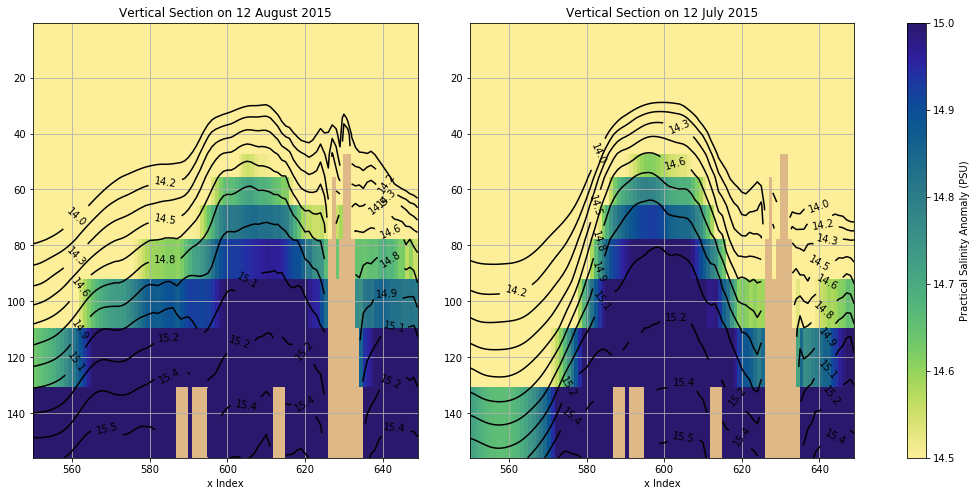

In [47]:
t = 12 

fig, axs = plt.subplots(1, 3, figsize=(16, 8), gridspec_kw={'width_ratios': [10, 10, 0.5]})

# Set up the figure and axes
# fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(12, 8))
land_colour = 'burlywood'
# for ax in (axl, axr):
#     ax.set_axis_bgcolor(land_colour)
# axl.set_position((0.125, 0.125, 0.6, 0.775))
# axcb.set_position((0.73, 0.125, 0.02, 0.775))
# axr.set_position((0.83, 0.125, 1.3, 0.775))



# Plot thalweg points on bathymetry map
# viz_tools.set_aspect(axs[0])
cmap = plt.get_cmap(cmo.cm.haline_r)
cmap.set_bad(land_colour)
sal_0 = sal_aug[t, :25, :,:]
sal_ano = np.empty_like(sal_0)
sal_0 = np.ma.masked_values(sal_0, 0)

for i in np.arange(sal_0.shape[0]):
    sal_ano[i,...] = sal_0[i,...] - np.mean(sal_aug[t,i,...])

sal_tzyx = np.ma.masked_values(sal_ano, 0)
x, z = np.meshgrid(x_wcvi_slice, zlevels[:25])
mesh = axs[0].pcolormesh(x_wcvi_slice, zlevels[:25], sal_tzyx[:25,265,x_wcvi_slice], cmap=cmap, vmin=14.5, vmax=15)
# cbar = plt.colorbar(mesh, cax=axr)
# cbar.set_label('Practical Salinity Anomaly (PSU)')
clines = axs[0].contour(x_wcvi_slice, zlevels[:25], sal_tzyx[:25,265,x_wcvi_slice], np.arange(14, 16, 0.15), colors='black')
axs[0].clabel(clines, fmt='%1.1f', inline=True)
axs[0].invert_yaxis()
axs[0].set_xlabel('x Index')
# axl.set_ylabel('{0.long_name} [{0.units}]'.format(zlevels))
axs[0].grid()
axs[0].set_title('Vertical Section on {0} August 2015'.format(t))

# Plot 24h average salinity at all depths along thalweg line
# viz_tools.set_aspect(axs[1])
cmap = plt.get_cmap(cmo.cm.haline_r)
cmap.set_bad(land_colour)
sal_0 = sal_july[t, :25, :,:]
sal_ano = np.empty_like(sal_0)
sal_0 = np.ma.masked_values(sal_0, 0)

for i in np.arange(sal_0.shape[0]):
    sal_ano[i,...] = sal_0[i,...] - np.mean(sal_july[t,i,...])

sal_tzyx = np.ma.masked_values(sal_ano, 0)
x, z = np.meshgrid(x_wcvi_slice, zlevels[:25])
mesh = axs[1].pcolormesh(x_wcvi_slice, zlevels[:25], sal_tzyx[:25,265,x_wcvi_slice], cmap=cmap, vmin=14.5, vmax=15)
cbar = plt.colorbar(mesh, cax=axcb)
cbar.set_label('Practical Salinity Anomaly (PSU)')
clines = axs[1].contour(x_wcvi_slice, zlevels[:25], sal_tzyx[:25,265,x_wcvi_slice], np.arange(14, 16, 0.15), colors='black')
axs[1].clabel(clines, fmt='%1.1f', inline=True)
axs[1].invert_yaxis()
axs[1].set_xlabel('x Index')
# axl.set_ylabel('{0.long_name} [{0.units}]'.format(zlevels))
axs[1].grid()
axs[1].set_title('Vertical Section on {0} July 2015'.format(t))


cbar = plt.colorbar(mesh, cax=axs[2])
cbar.set_label('Practical Salinity Anomaly (PSU)')

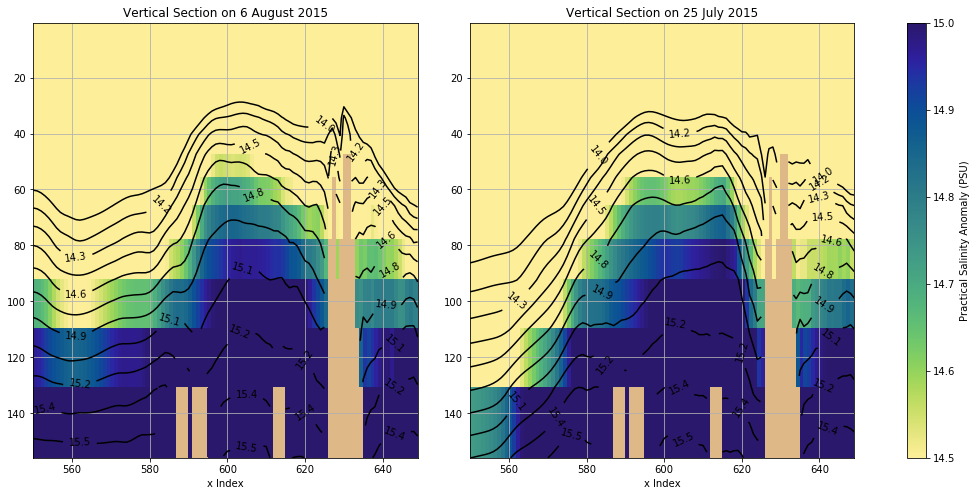

In [48]:
t_aug = 6
t_jul = 25

fig, axs = plt.subplots(1, 3, figsize=(16, 8), gridspec_kw={'width_ratios': [10, 10, 0.5]})

# Set up the figure and axes
# fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(12, 8))
land_colour = 'burlywood'
# for ax in (axl, axr):
#     ax.set_axis_bgcolor(land_colour)
# axl.set_position((0.125, 0.125, 0.6, 0.775))
# axcb.set_position((0.73, 0.125, 0.02, 0.775))
# axr.set_position((0.83, 0.125, 1.3, 0.775))



# Plot thalweg points on bathymetry map
# viz_tools.set_aspect(axs[0])
cmap = plt.get_cmap(cmo.cm.haline_r)
cmap.set_bad(land_colour)
sal_0 = sal_aug[t_aug, :25, :,:]
sal_ano = np.empty_like(sal_0)
sal_0 = np.ma.masked_values(sal_0, 0)

for i in np.arange(sal_0.shape[0]):
    sal_ano[i,...] = sal_0[i,...] - np.mean(sal_aug[t_aug,i,...])

sal_tzyx = np.ma.masked_values(sal_ano, 0)
x, z = np.meshgrid(x_wcvi_slice, zlevels[:25])
mesh = axs[0].pcolormesh(x_wcvi_slice, zlevels[:25], sal_tzyx[:25,265,x_wcvi_slice], cmap=cmap, vmin=14.5, vmax=15)
# cbar = plt.colorbar(mesh, cax=axr)
# cbar.set_label('Practical Salinity Anomaly (PSU)')
clines = axs[0].contour(x_wcvi_slice, zlevels[:25], sal_tzyx[:25,265,x_wcvi_slice], np.arange(14, 16, 0.15), colors='black')
axs[0].clabel(clines, fmt='%1.1f', inline=True)
axs[0].invert_yaxis()
axs[0].set_xlabel('x Index')
# axl.set_ylabel('{0.long_name} [{0.units}]'.format(zlevels))
axs[0].grid()
axs[0].set_title('Vertical Section on {0} August 2015'.format(t_aug))

# Plot 24h average salinity at all depths along thalweg line
# viz_tools.set_aspect(axs[1])
cmap = plt.get_cmap(cmo.cm.haline_r)
cmap.set_bad(land_colour)
sal_0 = sal_july[t_jul, :25, :,:]
sal_ano = np.empty_like(sal_0)
sal_0 = np.ma.masked_values(sal_0, 0)

for i in np.arange(sal_0.shape[0]):
    sal_ano[i,...] = sal_0[i,...] - np.mean(sal_july[t_jul,i,...])

sal_tzyx = np.ma.masked_values(sal_ano, 0)
x, z = np.meshgrid(x_wcvi_slice, zlevels[:25])
mesh = axs[1].pcolormesh(x_wcvi_slice, zlevels[:25], sal_tzyx[:25,265,x_wcvi_slice], cmap=cmap, vmin=14.5, vmax=15)
cbar = plt.colorbar(mesh, cax=axcb)
cbar.set_label('Practical Salinity Anomaly (PSU)')
clines = axs[1].contour(x_wcvi_slice, zlevels[:25], sal_tzyx[:25,265,x_wcvi_slice], np.arange(14, 16, 0.15), colors='black')
axs[1].clabel(clines, fmt='%1.1f', inline=True)
axs[1].invert_yaxis()
axs[1].set_xlabel('x Index')
# axl.set_ylabel('{0.long_name} [{0.units}]'.format(zlevels))
axs[1].grid()
axs[1].set_title('Vertical Section on {0} July 2015'.format(t_jul))


cbar = plt.colorbar(mesh, cax=axs[2])
cbar.set_label('Practical Salinity Anomaly (PSU)')

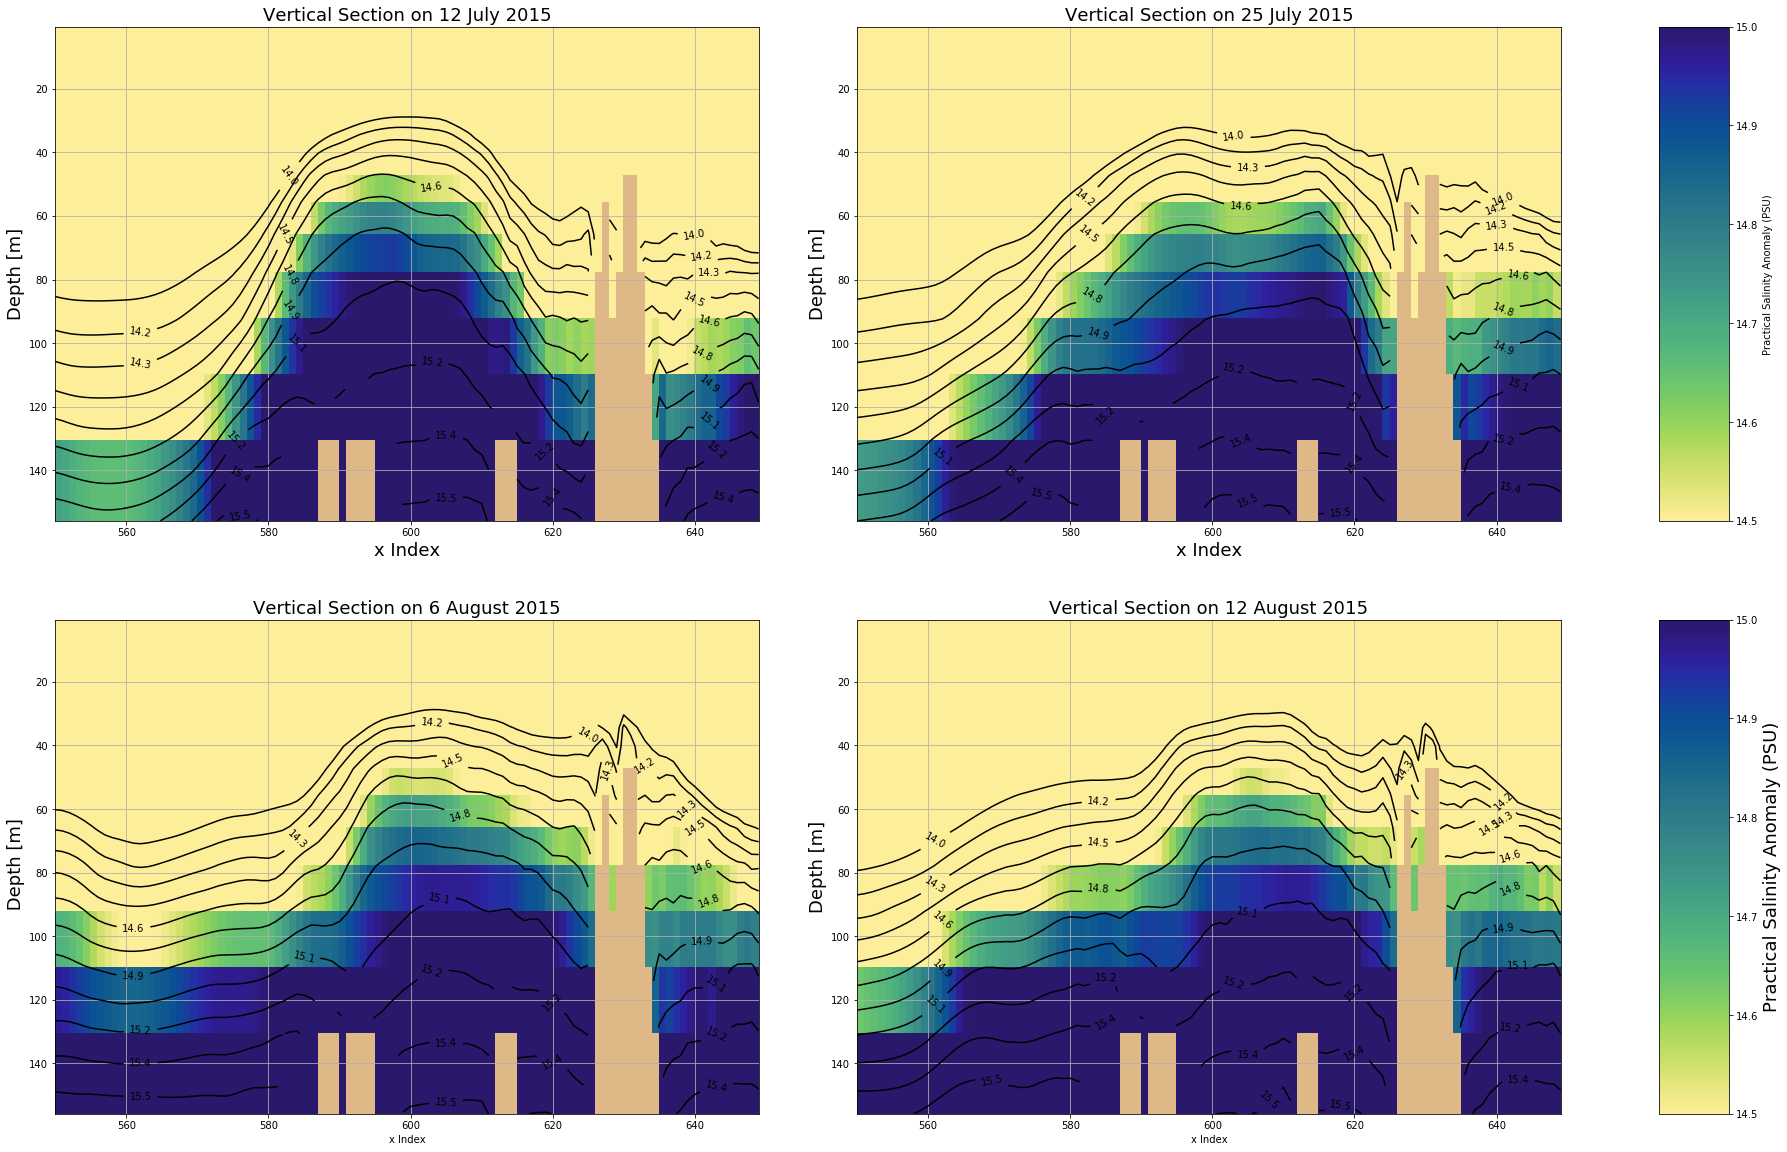

In [86]:
t_aug = 6
t_jul = 25

t_aug = 6
t_jul = 25

fig, axs = plt.subplots(2, 3, figsize=(30, 20), gridspec_kw={'width_ratios': [10, 10, 1]})

# Set up the figure and axes
# fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(12, 8))
land_colour = 'burlywood'
# for ax in (axl, axr):
#     ax.set_axis_bgcolor(land_colour)
# axl.set_position((0.125, 0.125, 0.6, 0.775))
# axcb.set_position((0.73, 0.125, 0.02, 0.775))
# axr.set_position((0.83, 0.125, 1.3, 0.775))

# Plot 24h average salinity at all depths along thalweg line
# viz_tools.set_aspect(axs[0])
cmap = plt.get_cmap(cmo.cm.haline_r)
cmap.set_bad(land_colour)


sal_0 = sal_july[t, :25, :,:]
sal_ano = np.empty_like(sal_0)
sal_0 = np.ma.masked_values(sal_0, 0)

for i in np.arange(sal_0.shape[0]):
    sal_ano[i,...] = sal_0[i,...] - np.mean(sal_july[t,i,...])

sal_tzyx = np.ma.masked_values(sal_ano, 0)
x, z = np.meshgrid(x_wcvi_slice, zlevels[:25])
mesh = axs[0,0].pcolormesh(x_wcvi_slice, zlevels[:25], sal_tzyx[:25,265,x_wcvi_slice], cmap=cmap, vmin=14.5, vmax=15)
clines = axs[0,0].contour(x_wcvi_slice, zlevels[:25], sal_tzyx[:25,265,x_wcvi_slice], np.arange(14, 16, 0.15), colors='black')
axs[0,0].clabel(clines, fmt='%1.1f', inline=True)
axs[0,0].invert_yaxis()
axs[0,0].set_xlabel('x Index',fontsize=18)
axs[0,0].set_ylabel('Depth [{0.units}]'.format(zlevels),fontsize=18)
axs[0,0].grid()
axs[0,0].set_title('Vertical Section on {0} July 2015'.format(t),fontsize=18)



sal_0 = sal_july[t_jul, :25, :,:]
sal_ano = np.empty_like(sal_0)
sal_0 = np.ma.masked_values(sal_0, 0)

for i in np.arange(sal_0.shape[0]):
    sal_ano[i,...] = sal_0[i,...] - np.mean(sal_july[t_jul,i,...])

sal_tzyx = np.ma.masked_values(sal_ano, 0)
x, z = np.meshgrid(x_wcvi_slice, zlevels[:25])
mesh = axs[0,1].pcolormesh(x_wcvi_slice, zlevels[:25], sal_tzyx[:25,265,x_wcvi_slice], cmap=cmap, vmin=14.5, vmax=15)
clines = axs[0,1].contour(x_wcvi_slice, zlevels[:25], sal_tzyx[:25,265,x_wcvi_slice], np.arange(14, 16, 0.15), colors='black')
axs[0,1].clabel(clines, fmt='%1.1f', inline=True)
axs[0,1].invert_yaxis()
axs[0,1].set_xlabel('x Index',fontsize=18)
axs[0,1].set_ylabel('Depth [{0.units}]'.format(zlevels),fontsize=18)
axs[0,1].grid()
axs[0,1].set_title('Vertical Section on {0} July 2015'.format(t_jul),fontsize=18)




cbar = plt.colorbar(mesh, cax=axs[0,2])
cbar.set_label('Practical Salinity Anomaly (PSU)')



sal_0 = sal_aug[t_aug, :25, :,:]
sal_ano = np.empty_like(sal_0)
sal_0 = np.ma.masked_values(sal_0, 0)

for i in np.arange(sal_0.shape[0]):
    sal_ano[i,...] = sal_0[i,...] - np.mean(sal_aug[t_aug,i,...])

sal_tzyx = np.ma.masked_values(sal_ano, 0)
x, z = np.meshgrid(x_wcvi_slice, zlevels[:25])
mesh = axs[1,0].pcolormesh(x_wcvi_slice, zlevels[:25], sal_tzyx[:25,265,x_wcvi_slice], cmap=cmap, vmin=14.5, vmax=15)
clines = axs[1,0].contour(x_wcvi_slice, zlevels[:25], sal_tzyx[:25,265,x_wcvi_slice], np.arange(14, 16, 0.15), colors='black')
axs[1,0].clabel(clines, fmt='%1.1f', inline=True)
axs[1,0].invert_yaxis()
axs[1,0].set_xlabel('x Index')
axs[1,0].set_ylabel(' Depth [{0.units}]'.format(zlevels),fontsize=18)
axs[1,0].grid()
axs[1,0].set_title('Vertical Section on {0} August 2015'.format(t_aug),fontsize=18)


sal_0 = sal_aug[t, :25, :,:]
sal_ano = np.empty_like(sal_0)
sal_0 = np.ma.masked_values(sal_0, 0)

for i in np.arange(sal_0.shape[0]):
    sal_ano[i,...] = sal_0[i,...] - np.mean(sal_aug[t,i,...])

sal_tzyx = np.ma.masked_values(sal_ano, 0)
x, z = np.meshgrid(x_wcvi_slice, zlevels[:25])
mesh = axs[1,1].pcolormesh(x_wcvi_slice, zlevels[:25], sal_tzyx[:25,265,x_wcvi_slice], cmap=cmap, vmin=14.5, vmax=15)
clines = axs[1,1].contour(x_wcvi_slice, zlevels[:25], sal_tzyx[:25,265,x_wcvi_slice], np.arange(14, 16, 0.15), colors='black')
axs[1,1].clabel(clines, fmt='%1.1f', inline=True)
axs[1,1].invert_yaxis()
axs[1,1].set_xlabel('x Index')
axs[1,1].set_ylabel('Depth [{0.units}]'.format(zlevels),fontsize=18)
axs[1,1].grid()
axs[1,1].set_title('Vertical Section on {0} August 2015'.format(t),fontsize=18)


cbar = plt.colorbar(mesh, cax=axs[1,2],)
cbar.set_label('Practical Salinity Anomaly (PSU)',fontsize=18)

In [12]:
import gsw


pressure_loc = gsw.p_from_z(-zlevels[:],np.mean(lat))




# t =12

# sal_0 = sal_july[t, :, :,:]
# temp_0 = temp_july[t,:,:,:]

SA_loc_jul = np.empty_like(sal_july)
CT_loc_jul = np.empty_like(sal_july)
spic_jul = np.empty_like(sal_july)

for t in np.arange(sal_july.shape[0]):
    for k in np.arange(sal_july.shape[0]):
        for j in np.arange(250,350):
            for i in np.arange(550,650):
                SA_loc_jul[t,k,j,i] = gsw.SA_from_SP(sal_july[t,k,j,i], pressure_loc[k], lon[j,i], lat[j,i])
                CT_loc_jul[t,k,j,i] = gsw.CT_from_pt(sal_july[t,k,j,i], temp_july[t,k,j,i])
                spic_jul[t,k,j,i] = gsw.spiciness0(SA_loc_jul[t,k,j,i],CT_loc_jul[t,k,j,i])

/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


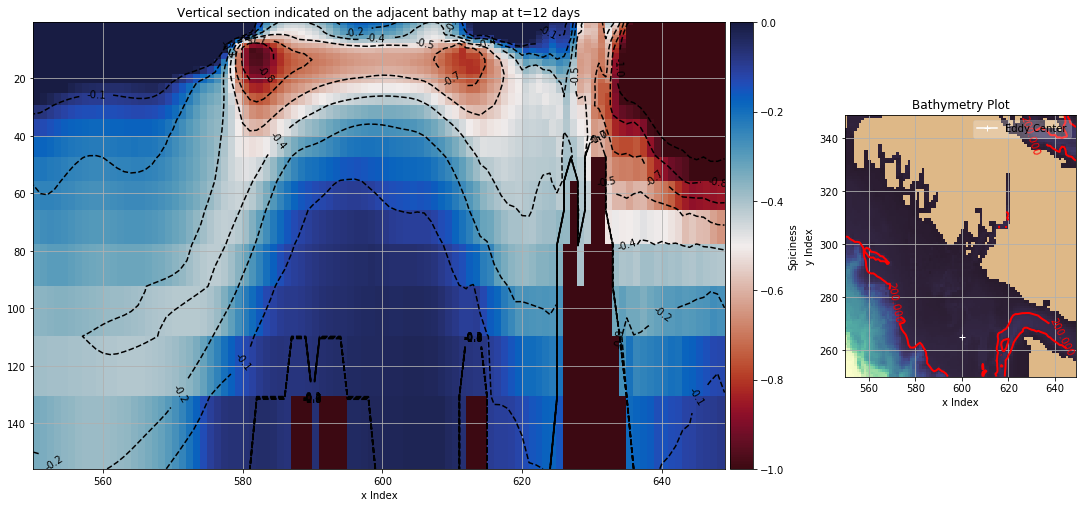

In [78]:
# Set up the figure and axes
fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(16, 8))
land_colour = 'burlywood'
for ax in (axl, axr):
    ax.set_axis_bgcolor(land_colour)
axl.set_position((0.125, 0.125, 0.6, 0.775))
axcb.set_position((0.73, 0.125, 0.02, 0.775))
axr.set_position((0.83, 0.125, 0.2, 0.775))

# Plot thalweg points on bathymetry map
viz_tools.set_aspect(axr)
cmap = plt.get_cmap(cmo.cm.deep_r)
cmap.set_bad(land_colour)
# bathy = bathymetry
# x_slice = np.arange(bathy.shape[1])
# y_slice = np.arange(bathy.shape[0])
axr.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[250:350,550:650], cmap=cmap, vmin=0)
axr.plot(
    600, 265,
    linestyle='-', marker='+', color='white',
    label='Eddy Center',
)
legend = axr.legend(loc='best', fancybox=True, framealpha=0.25)
axr.set_title('Bathymetry Plot')
axr.set_xlabel('x Index')
axr.set_ylabel('y Index')
CS = axr.contour(x_wcvi_slice,y_wcvi_slice,Z[250:350,550:650], levels = [200],
                 colors=('red',),linestyles=('-',),linewidths=(2,))


axr.clabel(CS)
axr.grid()

# Plot 24h average salinity at all depths along thalweg line
t = 12 
cmap = plt.get_cmap(cmo.cm.balance_r)
cmap.set_bad(land_colour)
spic_0 = spic_jul[t,:25, :,:]
spic_tzyx = np.ma.masked_values(spic_0, 0)
x, z = np.meshgrid(x_wcvi_slice, zlevels[:25])
mesh = axl.pcolormesh(x_wcvi_slice, zlevels[:25], spic_tzyx[:25,265,x_wcvi_slice], cmap=cmap, vmin=-1, vmax=0)
cbar = plt.colorbar(mesh, cax=axcb)
cbar.set_label('Spiciness')
clines = axl.contour(x_wcvi_slice, zlevels[:25], spic_tzyx[:25,265,x_wcvi_slice], np.arange(-1, 0, 0.15), colors='black')
axl.clabel(clines, fmt='%1.1f', inline=True)
axl.invert_yaxis()
axl.set_xlabel('x Index')
# axl.set_ylabel('{0.long_name} [{0.units}]'.format(zlevels))
axl.grid()
axl.set_title('Vertical section indicated on the adjacent bathy map at t={0} days'.format(t))

In [13]:
import gsw


pressure_loc = gsw.p_from_z(-zlevels[:],np.mean(lat))



SA_loc_aug = np.empty_like(sal_aug)
CT_loc_aug = np.empty_like(sal_aug)
spic_aug = np.empty_like(sal_aug)

for t in np.arange(sal_aug.shape[0]):
    for k in np.arange(sal_aug.shape[0]):
        for j in np.arange(250,350):
            for i in np.arange(550,650):
                SA_loc_aug[t,k,j,i] = gsw.SA_from_SP(sal_aug[t,k,j,i], pressure_loc[k], lon[j,i], lat[j,i])
                CT_loc_aug[t,k,j,i] = gsw.CT_from_pt(sal_aug[t,k,j,i], temp_aug[t,k,j,i])
                spic_aug[t,k,j,i] = gsw.spiciness0(SA_loc_aug[t,k,j,i],CT_loc_aug[t,k,j,i])

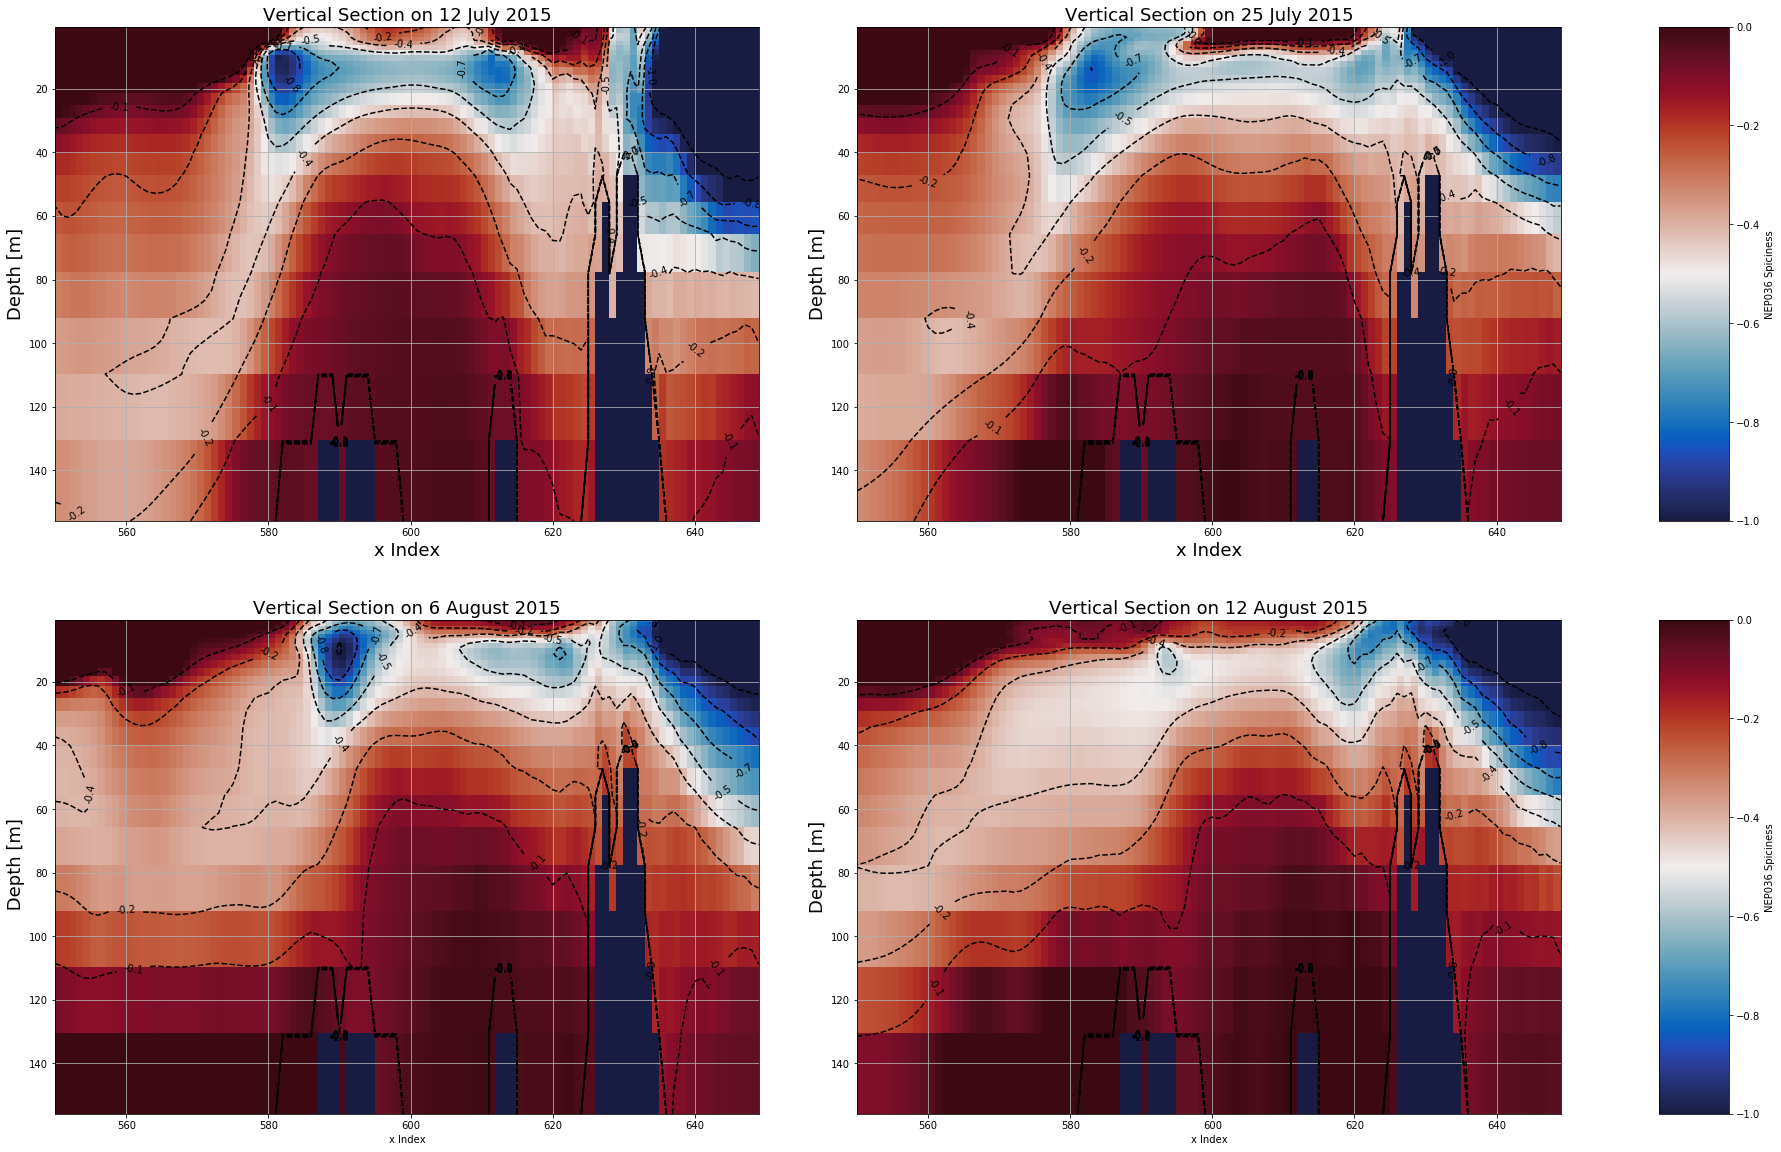

In [14]:
t_aug = 6
t_jul = 25
t = 12
level = 20

import matplotlib as mpl

norm = mpl.colors.Normalize(vmin=-1,vmax=0)

fig, axs = plt.subplots(2, 3, figsize=(30, 20), gridspec_kw={'width_ratios': [10, 10, 1]})

# Set up the figure and axes
# fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(12, 8))
land_colour = 'burlywood'
# for ax in (axl, axr):
#     ax.set_axis_bgcolor(land_colour)
# axl.set_position((0.125, 0.125, 0.6, 0.775))
# axcb.set_position((0.73, 0.125, 0.02, 0.775))
# axr.set_position((0.83, 0.125, 1.3, 0.775))

# Plot 24h average salinity at all depths along thalweg line
# viz_tools.set_aspect(axs[0])
cmap = plt.get_cmap(cmo.cm.balance)
cmap.set_bad(land_colour)


spic_0 = spic_jul[t, :25, :,:]
spic_tzyx = np.ma.masked_values(spic_0, 0)

x, z = np.meshgrid(x_wcvi_slice, zlevels[:25])
mesh = axs[0,0].pcolormesh(x_wcvi_slice, zlevels[:25], spic_tzyx[:25,265,x_wcvi_slice], cmap=cmap, vmin=-1, vmax=0)
clines = axs[0,0].contour(x_wcvi_slice, zlevels[:25], spic_tzyx[:25,265,x_wcvi_slice], np.arange(-1, 0, 0.15), colors='black')
axs[0,0].clabel(clines, fmt='%1.1f', inline=True)
axs[0,0].invert_yaxis()
axs[0,0].set_xlabel('x Index',fontsize=18)
axs[0,0].set_ylabel('Depth [{0.units}]'.format(zlevels),fontsize=18)
axs[0,0].grid()
axs[0,0].set_title('Vertical Section on {0} July 2015'.format(t),fontsize=18)



spic_0 = spic_jul[t_jul, :25, :,:]
spic_tzyx = np.ma.masked_values(spic_0, 0)

x, z = np.meshgrid(x_wcvi_slice, zlevels[:25])
mesh = axs[0,1].pcolormesh(x_wcvi_slice, zlevels[:25], spic_tzyx[:25,265,x_wcvi_slice], cmap=cmap, vmin=-1, vmax=0)
clines = axs[0,1].contour(x_wcvi_slice, zlevels[:25], spic_tzyx[:25,265,x_wcvi_slice], np.arange(-1, 0, 0.15), colors='black')
axs[0,1].clabel(clines, fmt='%1.1f', inline=True)
axs[0,1].invert_yaxis()
axs[0,1].set_xlabel('x Index',fontsize=18)
axs[0,1].set_ylabel('Depth [{0.units}]'.format(zlevels),fontsize=18)
axs[0,1].grid()
axs[0,1].set_title('Vertical Section on {0} July 2015'.format(t_jul),fontsize=18)




cbar = plt.colorbar(mesh, cax=axs[0,2])
cbar.set_label('NEP036 Spiciness')



spic_0 = spic_aug[t_aug, :25, :,:]
spic_tzyx = np.ma.masked_values(spic_0, 0)

x, z = np.meshgrid(x_wcvi_slice, zlevels[:25])
mesh = axs[1,0].pcolormesh(x_wcvi_slice, zlevels[:25], spic_tzyx[:25,265,x_wcvi_slice], cmap=cmap, vmin=-1, vmax=0)
clines = axs[1,0].contour(x_wcvi_slice, zlevels[:25], spic_tzyx[:25,265,x_wcvi_slice], np.arange(-1, 0, 0.15), colors='black')
axs[1,0].clabel(clines, fmt='%1.1f', inline=True)
axs[1,0].invert_yaxis()
axs[1,0].set_xlabel('x Index')
axs[1,0].set_ylabel(' Depth [{0.units}]'.format(zlevels),fontsize=18)
axs[1,0].grid()
axs[1,0].set_title('Vertical Section on {0} August 2015'.format(t_aug),fontsize=18)


spic_0 = spic_aug[t, :25, :,:]
spic_tzyx = np.ma.masked_values(spic_0, 0)

x, z = np.meshgrid(x_wcvi_slice, zlevels[:25])
mesh = axs[1,1].pcolormesh(x_wcvi_slice, zlevels[:25], spic_tzyx[:25,265,x_wcvi_slice], cmap=cmap, vmin=-1, vmax=0)
clines = axs[1,1].contour(x_wcvi_slice, zlevels[:25], spic_tzyx[:25,265,x_wcvi_slice], np.arange(-1, 0, 0.15), colors='black')
axs[1,1].clabel(clines, fmt='%1.1f', inline=True)
axs[1,1].invert_yaxis()
axs[1,1].set_xlabel('x Index')
axs[1,1].set_ylabel('Depth [{0.units}]'.format(zlevels),fontsize=18)
axs[1,1].grid()
axs[1,1].set_title('Vertical Section on {0} August 2015'.format(t),fontsize=18)


cbar = plt.colorbar(mesh, cax=axs[1,2])
cbar.set_label('NEP036 Spiciness')

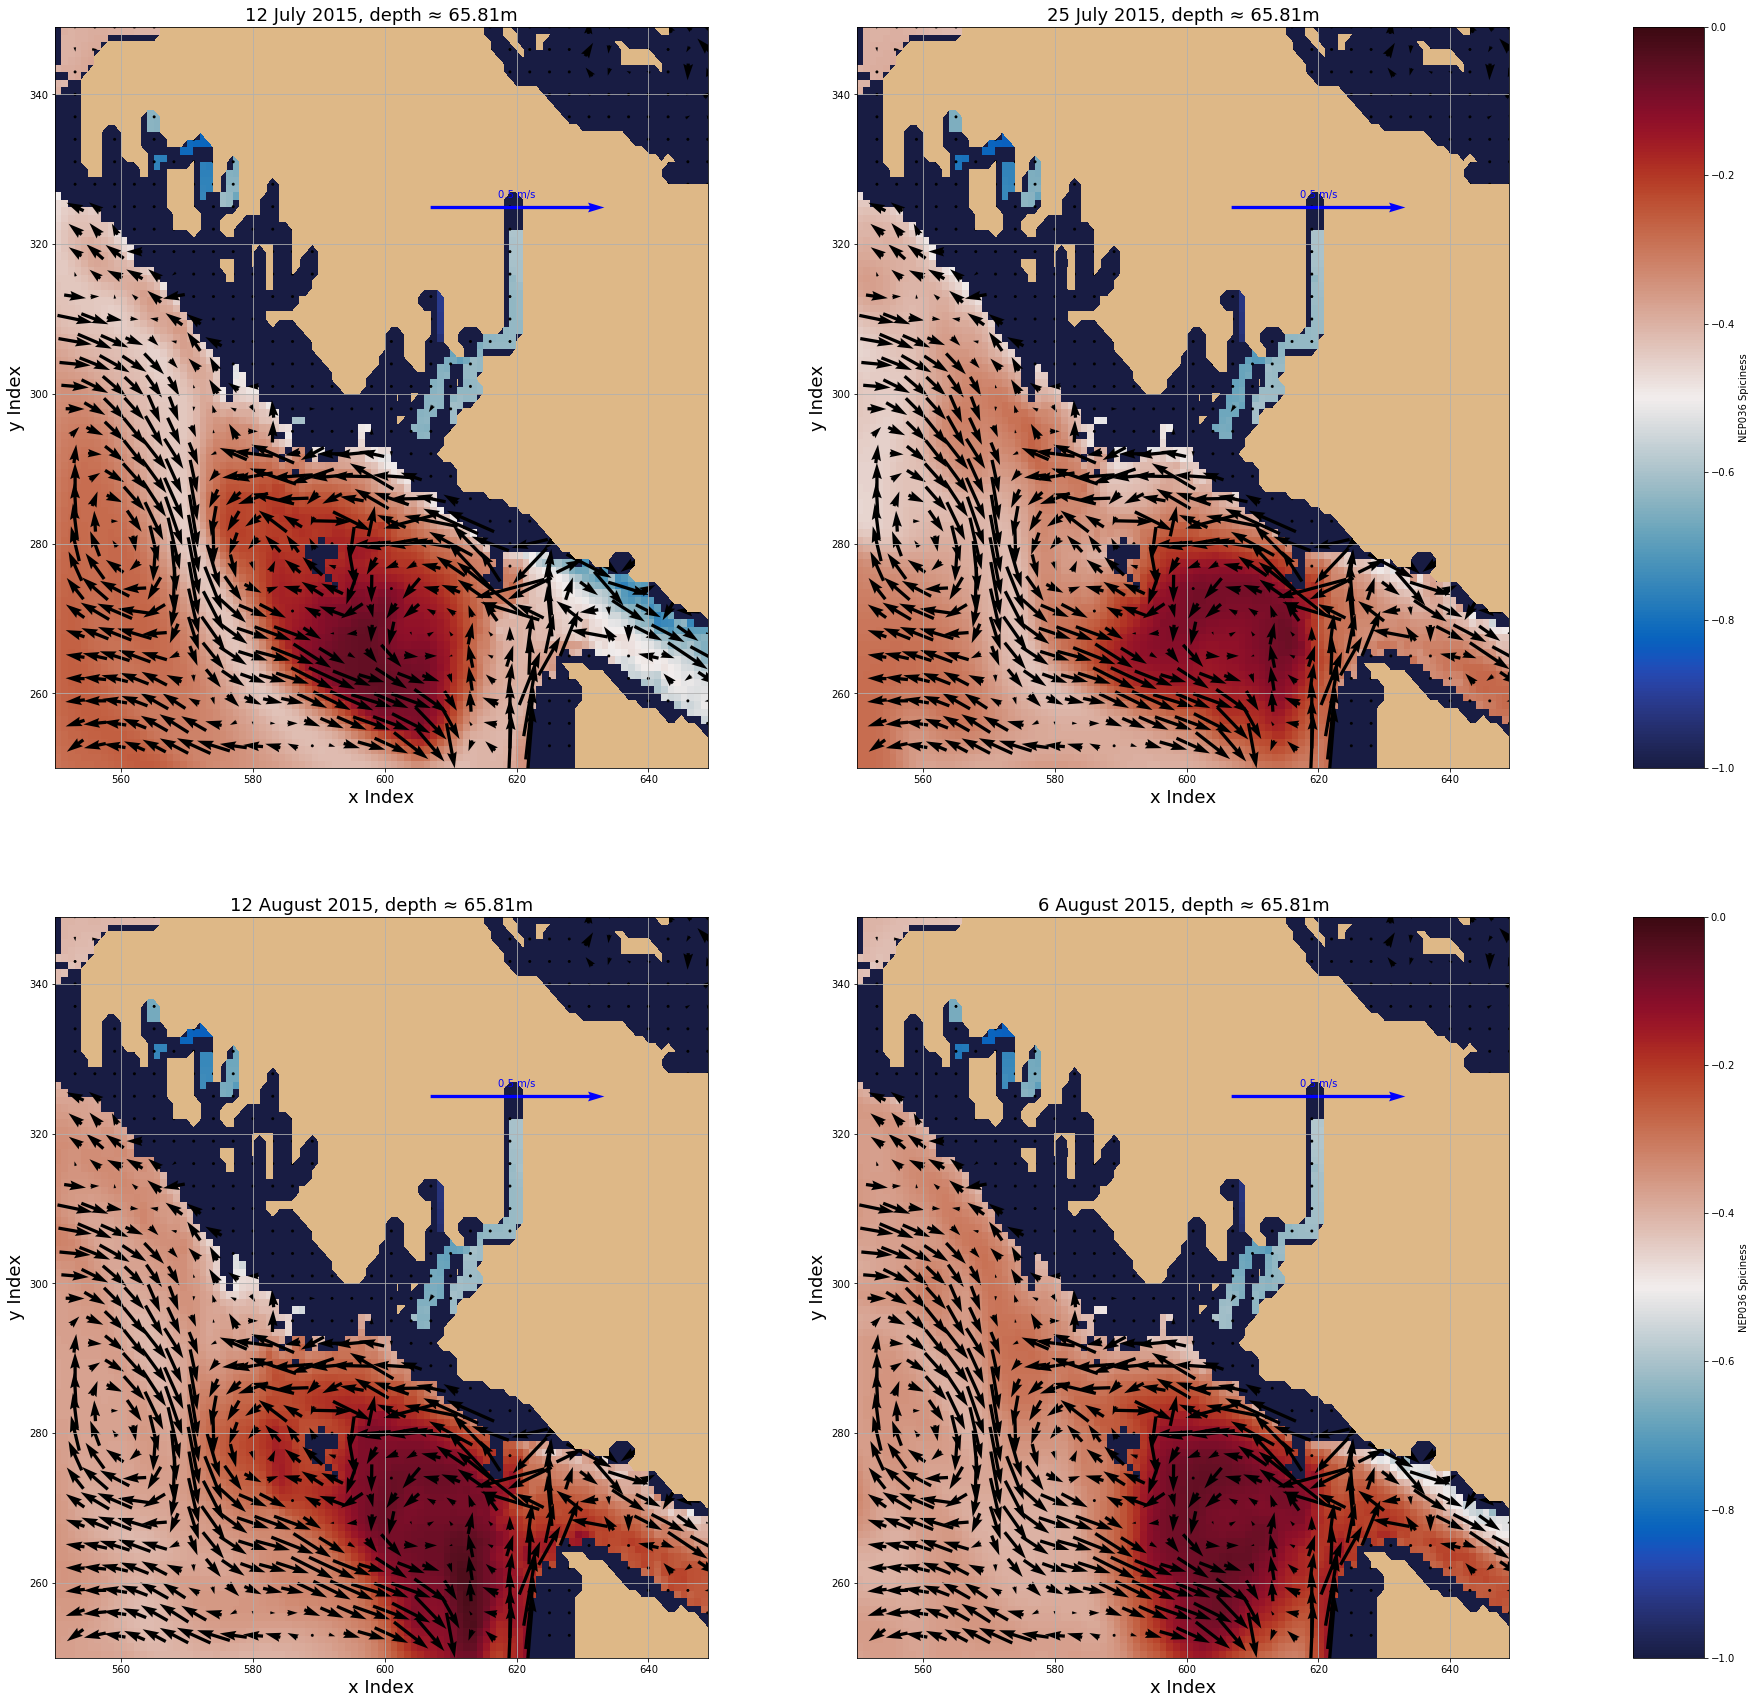

In [34]:
t_aug = 6
t_jul = 25
t = 12
level = 19


arrow_step = 3
y_slice_a = y_wcvi_slice[::arrow_step]
x_slice_a = x_wcvi_slice[::arrow_step]
cmap = plt.get_cmap(cmo.cm.haline)
cmap.set_bad('burlywood')

import matplotlib as mpl

norm = mpl.colors.Normalize(vmin=-1,vmax=0)

fig, axs = plt.subplots(2, 3, figsize=(30, 30), gridspec_kw={'width_ratios': [10, 10, 1]})

# Set up the figure and axes
# fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(12, 8))
land_colour = 'burlywood'
# for ax in (axl, axr):
#     ax.set_axis_bgcolor(land_colour)
# axl.set_position((0.125, 0.125, 0.6, 0.775))
# axcb.set_position((0.73, 0.125, 0.02, 0.775))
# axr.set_position((0.83, 0.125, 1.3, 0.775))

# Plot 24h average salinity at all depths along thalweg line
# viz_tools.set_aspect(axs[0])
cmap = plt.get_cmap(cmo.cm.balance)
cmap.set_bad(land_colour)

spic_0 = spic_jul[t, level, :,:]
spic_tzyx = np.ma.masked_values(spic_0, 0)

viz_tools.set_aspect(axs[0,0])
mesh = axs[0,0].pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx[250:350,550:650], cmap=cmap, vmin = -1, vmax = 0)
# mesh = ax.pcolormesh(x_wcvi_slice,y_wcvi_slice,temp_july[0,0,250:350,550:650], cmap=cmap, vmin = 12, vmax = 15)
# cbar = fig.colorbar(mesh)
# cbar.set_label('Salinity Anomlay (PSU)')
viz_tools.plot_land_mask(axs[0,0], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')

u_tzyx, v_tzyx = viz_tools.unstagger(u_aug[t,level,250:350,550:650], v_aug[t,level,250:350,550:650])
speeds = np.sqrt(np.square(u_tzyx) + np.square(v_tzyx))
quiver = axs[0,0].quiver(x_slice_a[1:], y_slice_a[1:], u_tzyx[::3,::3], v_tzyx[::3,::3] ,pivot='mid', cmap='Reds', width=0.005)
viz_tools.plot_land_mask(axs[0,0], bathy , xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')



axs[0,0].grid()
# Axes label and title
# Axes limits and grid
axs[0,0].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[0,0].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[0,0].set_xlabel('x Index',fontsize=18)
axs[0,0].set_ylabel('y Index',fontsize=18)
axs[0,0].set_title('{0} July 2015, depth \u2248 {d:.2f}{z.units}'.format(t, d=zlevels[level], z=zlevels),fontsize=18)
axs[0,0].quiverkey(quiver, 620, 325, 0.5, '0.5 m/s', coordinates='data', color='blue', labelcolor='blue')



spic_0 = spic_jul[t_jul, level, :,:]
spic_tzyx = np.ma.masked_values(spic_0, 0)

viz_tools.set_aspect(axs[0,1])
mesh = axs[0,1].pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx[250:350,550:650], cmap=cmap, vmin = -1, vmax = 0)
# mesh = ax.pcolormesh(x_wcvi_slice,y_wcvi_slice,temp_july[0,0,250:350,550:650], cmap=cmap, vmin = 12, vmax = 15)
# cbar = fig.colorbar(mesh)
# cbar.set_label('Salinity Anomlay (PSU)')
viz_tools.plot_land_mask(axs[0,1], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')

u_tzyx, v_tzyx = viz_tools.unstagger(u_aug[t,level,250:350,550:650], v_aug[t,level,250:350,550:650])
speeds = np.sqrt(np.square(u_tzyx) + np.square(v_tzyx))
quiver = axs[0,1].quiver(x_slice_a[1:], y_slice_a[1:], u_tzyx[::3,::3], v_tzyx[::3,::3] ,pivot='mid', cmap='Reds', width=0.005)
viz_tools.plot_land_mask(axs[0,1], bathy , xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')



axs[0,1].grid()
# Axes label and title
# Axes limits and grid
axs[0,1].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[0,1].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[0,1].set_xlabel('x Index',fontsize=18)
axs[0,1].set_ylabel('y Index',fontsize=18)
axs[0,1].set_title('{0} July 2015, depth \u2248 {d:.2f}{z.units}'.format(t_jul, d=zlevels[level], z=zlevels),fontsize=18)
axs[0,1].quiverkey(quiver, 620, 325, 0.5, '0.5 m/s', coordinates='data', color='blue', labelcolor='blue')




cbar = plt.colorbar(mesh, cax=axs[0,2])
cbar.set_label('NEP036 Spiciness')



spic_0 = spic_aug[t, level, :,:]
spic_tzyx = np.ma.masked_values(spic_0, 0)

viz_tools.set_aspect(axs[1,0])
mesh = axs[1,0].pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx[250:350,550:650], cmap=cmap, vmin = -1, vmax = 0)
# mesh = ax.pcolormesh(x_wcvi_slice,y_wcvi_slice,temp_july[0,0,250:350,550:650], cmap=cmap, vmin = 12, vmax = 15)
# cbar = fig.colorbar(mesh)
# cbar.set_label('Salinity Anomlay (PSU)')
viz_tools.plot_land_mask(axs[1,0], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')

u_tzyx, v_tzyx = viz_tools.unstagger(u_aug[t,level,250:350,550:650], v_aug[t,level,250:350,550:650])
speeds = np.sqrt(np.square(u_tzyx) + np.square(v_tzyx))
quiver = axs[1,0].quiver(x_slice_a[1:], y_slice_a[1:], u_tzyx[::3,::3], v_tzyx[::3,::3] ,pivot='mid', cmap='Reds', width=0.005)
viz_tools.plot_land_mask(axs[1,0], bathy , xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')



axs[1,0].grid()
# Axes label and title
# Axes limits and grid
axs[1,0].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[1,0].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[1,0].set_xlabel('x Index',fontsize=18)
axs[1,0].set_ylabel('y Index',fontsize=18)
axs[1,0].set_title('{0} August 2015, depth \u2248 {d:.2f}{z.units}'.format(t, d=zlevels[level], z=zlevels),fontsize=18)
axs[1,0].quiverkey(quiver, 620, 325, 0.5, '0.5 m/s', coordinates='data', color='blue', labelcolor='blue')



spic_0 = spic_aug[t_aug, level, :,:]
spic_tzyx = np.ma.masked_values(spic_0, 0)

viz_tools.set_aspect(axs[1,1])
mesh = axs[1,1].pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx[250:350,550:650], cmap=cmap, vmin = -1, vmax = 0)
# mesh = ax.pcolormesh(x_wcvi_slice,y_wcvi_slice,temp_july[0,0,250:350,550:650], cmap=cmap, vmin = 12, vmax = 15)
# cbar = fig.colorbar(mesh)
# cbar.set_label('Salinity Anomlay (PSU)')
viz_tools.plot_land_mask(axs[1,1], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')

u_tzyx, v_tzyx = viz_tools.unstagger(u_aug[t,level,250:350,550:650], v_aug[t,level,250:350,550:650])
speeds = np.sqrt(np.square(u_tzyx) + np.square(v_tzyx))
quiver = axs[1,1].quiver(x_slice_a[1:], y_slice_a[1:], u_tzyx[::3,::3], v_tzyx[::3,::3] ,pivot='mid', cmap='Reds', width=0.005)
viz_tools.plot_land_mask(axs[1,1], bathy , xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')



axs[1,1].grid()
# Axes label and title
# Axes limits and grid
axs[1,1].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[1,1].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[1,1].set_xlabel('x Index',fontsize=18)
axs[1,1].set_ylabel('y Index',fontsize=18)
axs[1,1].set_title('{0} August 2015, depth \u2248 {d:.2f}{z.units}'.format(t_aug, d=zlevels[level], z=zlevels),fontsize=18)
axs[1,1].quiverkey(quiver, 620, 325, 0.5, '0.5 m/s', coordinates='data', color='blue', labelcolor='blue')


cbar = plt.colorbar(mesh, cax=axs[1,2])
cbar.set_label('NEP036 Spiciness')

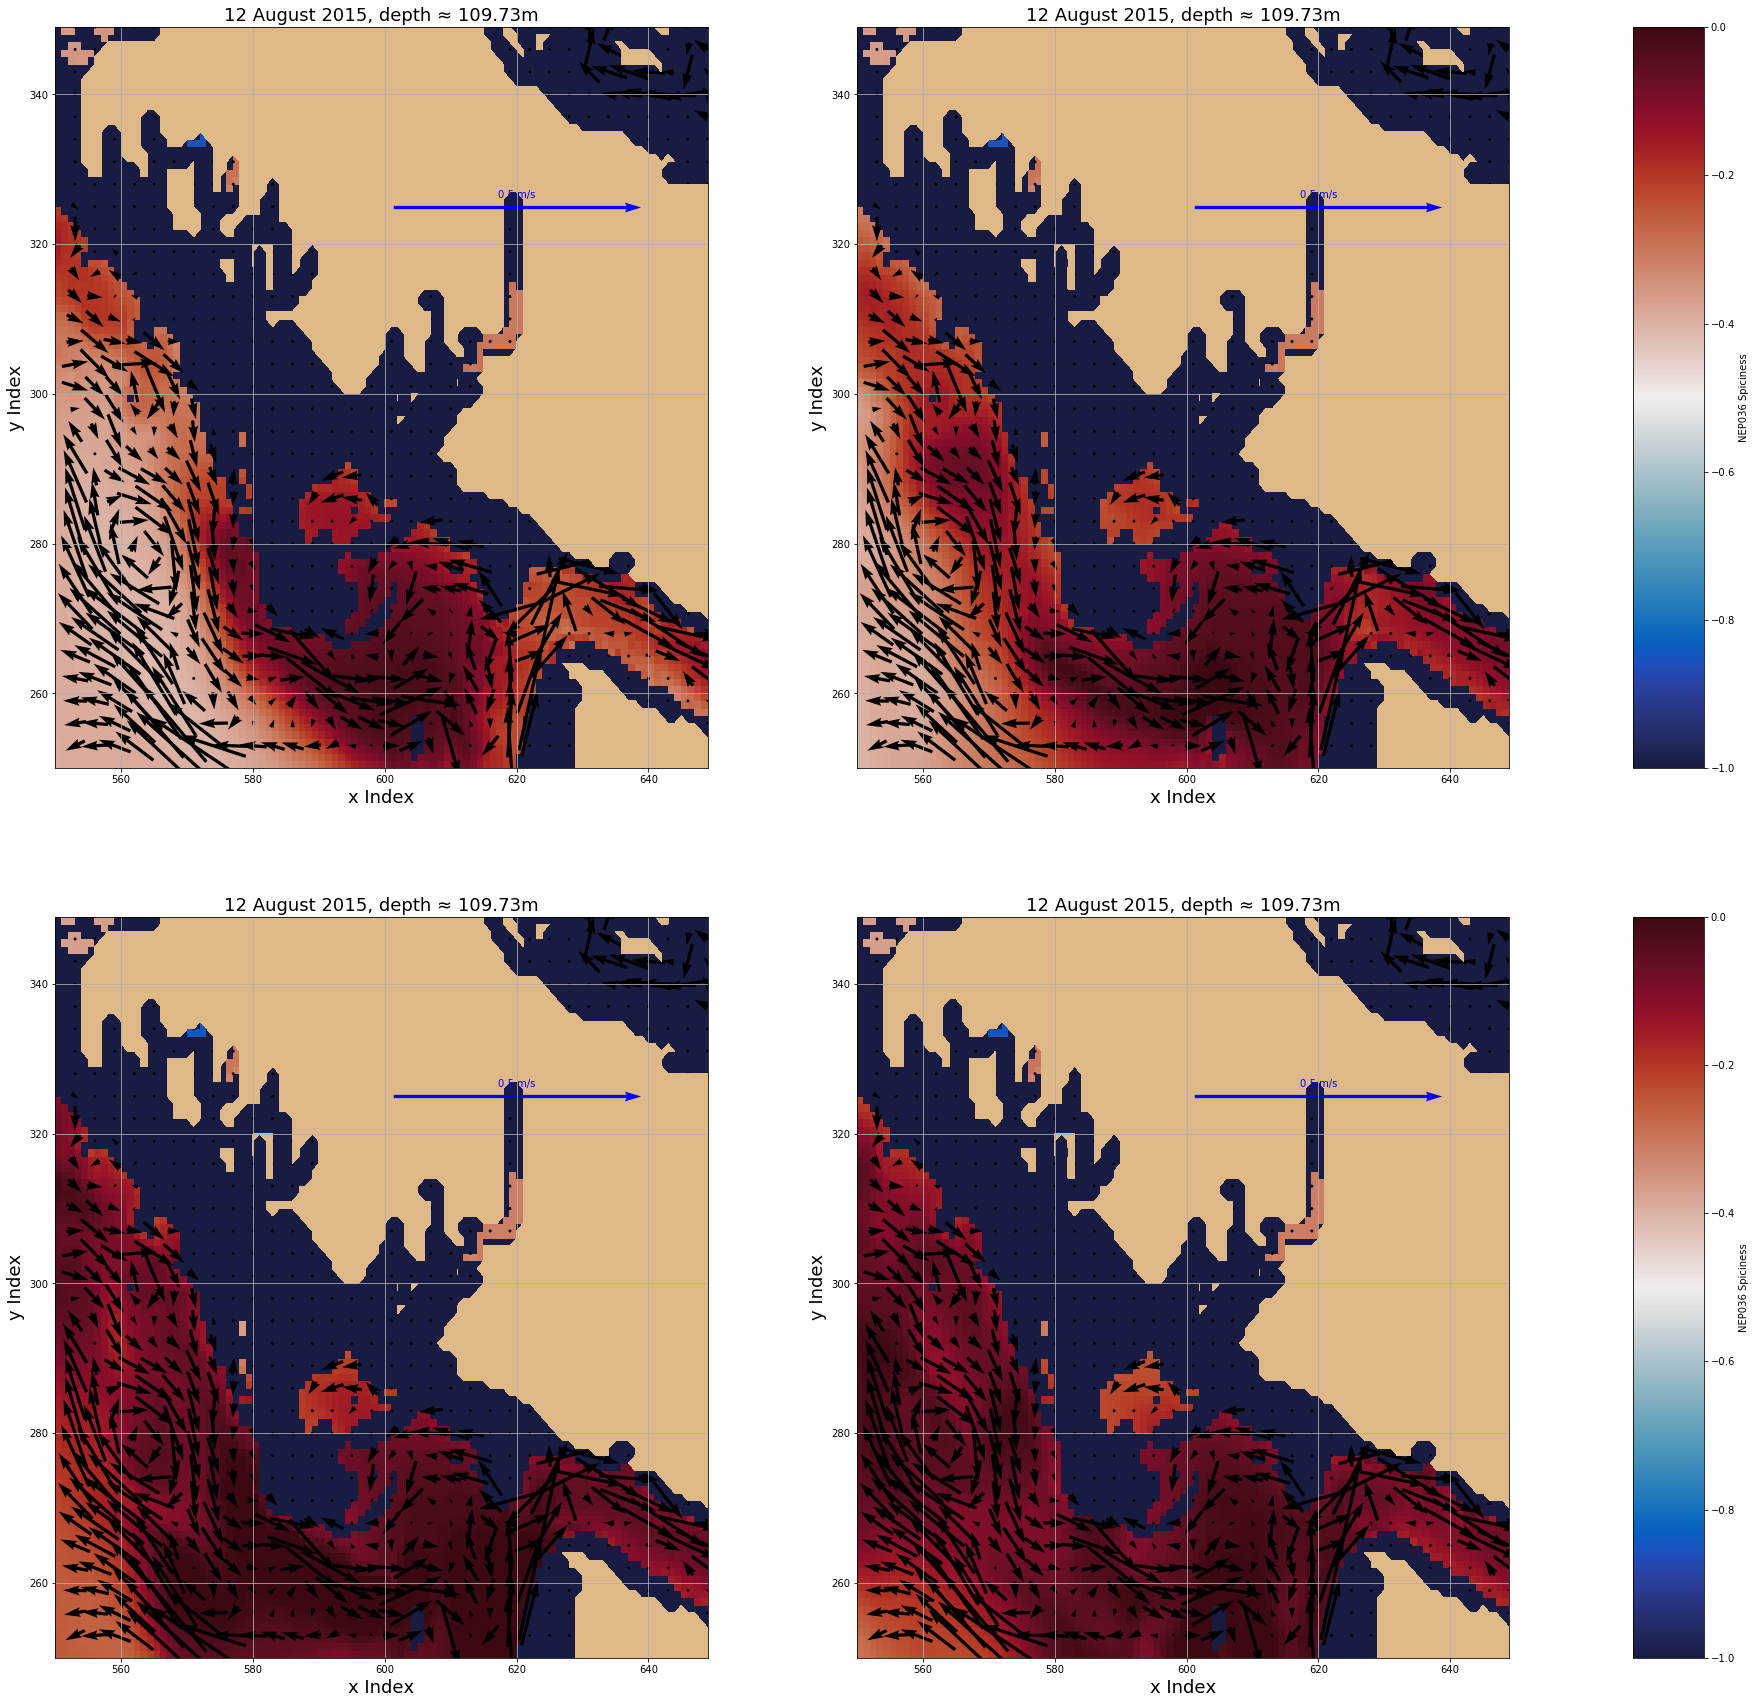

In [33]:
t_aug = 6
t_jul = 25
t = 12
level = 22


arrow_step = 3
y_slice_a = y_wcvi_slice[::arrow_step]
x_slice_a = x_wcvi_slice[::arrow_step]
cmap = plt.get_cmap(cmo.cm.haline)
cmap.set_bad('burlywood')

import matplotlib as mpl

norm = mpl.colors.Normalize(vmin=-1,vmax=0)

fig, axs = plt.subplots(2, 3, figsize=(30, 30), gridspec_kw={'width_ratios': [10, 10, 1]})

# Set up the figure and axes
# fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(12, 8))
land_colour = 'burlywood'
# for ax in (axl, axr):
#     ax.set_axis_bgcolor(land_colour)
# axl.set_position((0.125, 0.125, 0.6, 0.775))
# axcb.set_position((0.73, 0.125, 0.02, 0.775))
# axr.set_position((0.83, 0.125, 1.3, 0.775))

# Plot 24h average salinity at all depths along thalweg line
# viz_tools.set_aspect(axs[0])
cmap = plt.get_cmap(cmo.cm.balance)
cmap.set_bad(land_colour)

spic_0 = spic_jul[t, level, :,:]
spic_tzyx = np.ma.masked_values(spic_0, 0)

viz_tools.set_aspect(axs[0,0])
mesh = axs[0,0].pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx[250:350,550:650], cmap=cmap, vmin = -1, vmax = 0)
# mesh = ax.pcolormesh(x_wcvi_slice,y_wcvi_slice,temp_july[0,0,250:350,550:650], cmap=cmap, vmin = 12, vmax = 15)
# cbar = fig.colorbar(mesh)
# cbar.set_label('Salinity Anomlay (PSU)')
viz_tools.plot_land_mask(axs[0,0], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')

u_tzyx, v_tzyx = viz_tools.unstagger(u_aug[t,level,250:350,550:650], v_aug[t,level,250:350,550:650])
speeds = np.sqrt(np.square(u_tzyx) + np.square(v_tzyx))
quiver = axs[0,0].quiver(x_slice_a[1:], y_slice_a[1:], u_tzyx[::3,::3], v_tzyx[::3,::3] ,pivot='mid', cmap='Reds', width=0.005)
viz_tools.plot_land_mask(axs[0,0], bathy , xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')



axs[0,0].grid()
# Axes label and title
# Axes limits and grid
axs[0,0].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[0,0].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[0,0].set_xlabel('x Index',fontsize=18)
axs[0,0].set_ylabel('y Index',fontsize=18)
axs[0,0].set_title('{0} August 2015, depth \u2248 {d:.2f}{z.units}'.format(t, d=zlevels[level], z=zlevels),fontsize=18)
axs[0,0].quiverkey(quiver, 620, 325, 0.5, '0.5 m/s', coordinates='data', color='blue', labelcolor='blue')



spic_0 = spic_jul[t_jul, level, :,:]
spic_tzyx = np.ma.masked_values(spic_0, 0)

viz_tools.set_aspect(axs[0,1])
mesh = axs[0,1].pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx[250:350,550:650], cmap=cmap, vmin = -1, vmax = 0)
# mesh = ax.pcolormesh(x_wcvi_slice,y_wcvi_slice,temp_july[0,0,250:350,550:650], cmap=cmap, vmin = 12, vmax = 15)
# cbar = fig.colorbar(mesh)
# cbar.set_label('Salinity Anomlay (PSU)')
viz_tools.plot_land_mask(axs[0,1], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')

u_tzyx, v_tzyx = viz_tools.unstagger(u_aug[t,level,250:350,550:650], v_aug[t,level,250:350,550:650])
speeds = np.sqrt(np.square(u_tzyx) + np.square(v_tzyx))
quiver = axs[0,1].quiver(x_slice_a[1:], y_slice_a[1:], u_tzyx[::3,::3], v_tzyx[::3,::3] ,pivot='mid', cmap='Reds', width=0.005)
viz_tools.plot_land_mask(axs[0,1], bathy , xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')



axs[0,1].grid()
# Axes label and title
# Axes limits and grid
axs[0,1].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[0,1].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[0,1].set_xlabel('x Index',fontsize=18)
axs[0,1].set_ylabel('y Index',fontsize=18)
axs[0,1].set_title('{0} August 2015, depth \u2248 {d:.2f}{z.units}'.format(t, d=zlevels[level], z=zlevels),fontsize=18)
axs[0,1].quiverkey(quiver, 620, 325, 0.5, '0.5 m/s', coordinates='data', color='blue', labelcolor='blue')




cbar = plt.colorbar(mesh, cax=axs[0,2])
cbar.set_label('NEP036 Spiciness')



spic_0 = spic_aug[t, level, :,:]
spic_tzyx = np.ma.masked_values(spic_0, 0)

viz_tools.set_aspect(axs[1,0])
mesh = axs[1,0].pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx[250:350,550:650], cmap=cmap, vmin = -1, vmax = 0)
# mesh = ax.pcolormesh(x_wcvi_slice,y_wcvi_slice,temp_july[0,0,250:350,550:650], cmap=cmap, vmin = 12, vmax = 15)
# cbar = fig.colorbar(mesh)
# cbar.set_label('Salinity Anomlay (PSU)')
viz_tools.plot_land_mask(axs[1,0], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')

u_tzyx, v_tzyx = viz_tools.unstagger(u_aug[t,level,250:350,550:650], v_aug[t,level,250:350,550:650])
speeds = np.sqrt(np.square(u_tzyx) + np.square(v_tzyx))
quiver = axs[1,0].quiver(x_slice_a[1:], y_slice_a[1:], u_tzyx[::3,::3], v_tzyx[::3,::3] ,pivot='mid', cmap='Reds', width=0.005)
viz_tools.plot_land_mask(axs[1,0], bathy , xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')



axs[1,0].grid()
# Axes label and title
# Axes limits and grid
axs[1,0].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[1,0].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[1,0].set_xlabel('x Index',fontsize=18)
axs[1,0].set_ylabel('y Index',fontsize=18)
axs[1,0].set_title('{0} August 2015, depth \u2248 {d:.2f}{z.units}'.format(t, d=zlevels[level], z=zlevels),fontsize=18)
axs[1,0].quiverkey(quiver, 620, 325, 0.5, '0.5 m/s', coordinates='data', color='blue', labelcolor='blue')



spic_0 = spic_aug[t_aug, level, :,:]
spic_tzyx = np.ma.masked_values(spic_0, 0)

viz_tools.set_aspect(axs[1,1])
mesh = axs[1,1].pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx[250:350,550:650], cmap=cmap, vmin = -1, vmax = 0)
# mesh = ax.pcolormesh(x_wcvi_slice,y_wcvi_slice,temp_july[0,0,250:350,550:650], cmap=cmap, vmin = 12, vmax = 15)
# cbar = fig.colorbar(mesh)
# cbar.set_label('Salinity Anomlay (PSU)')
viz_tools.plot_land_mask(axs[1,1], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')

u_tzyx, v_tzyx = viz_tools.unstagger(u_aug[t,level,250:350,550:650], v_aug[t,level,250:350,550:650])
speeds = np.sqrt(np.square(u_tzyx) + np.square(v_tzyx))
quiver = axs[1,1].quiver(x_slice_a[1:], y_slice_a[1:], u_tzyx[::3,::3], v_tzyx[::3,::3] ,pivot='mid', cmap='Reds', width=0.005)
viz_tools.plot_land_mask(axs[1,1], bathy , xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')



axs[1,1].grid()
# Axes label and title
# Axes limits and grid
axs[1,1].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[1,1].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[1,1].set_xlabel('x Index',fontsize=18)
axs[1,1].set_ylabel('y Index',fontsize=18)
axs[1,1].set_title('{0} August 2015, depth \u2248 {d:.2f}{z.units}'.format(t, d=zlevels[level], z=zlevels),fontsize=18)
axs[1,1].quiverkey(quiver, 620, 325, 0.5, '0.5 m/s', coordinates='data', color='blue', labelcolor='blue')


cbar = plt.colorbar(mesh, cax=axs[1,2])
cbar.set_label('NEP036 Spiciness')

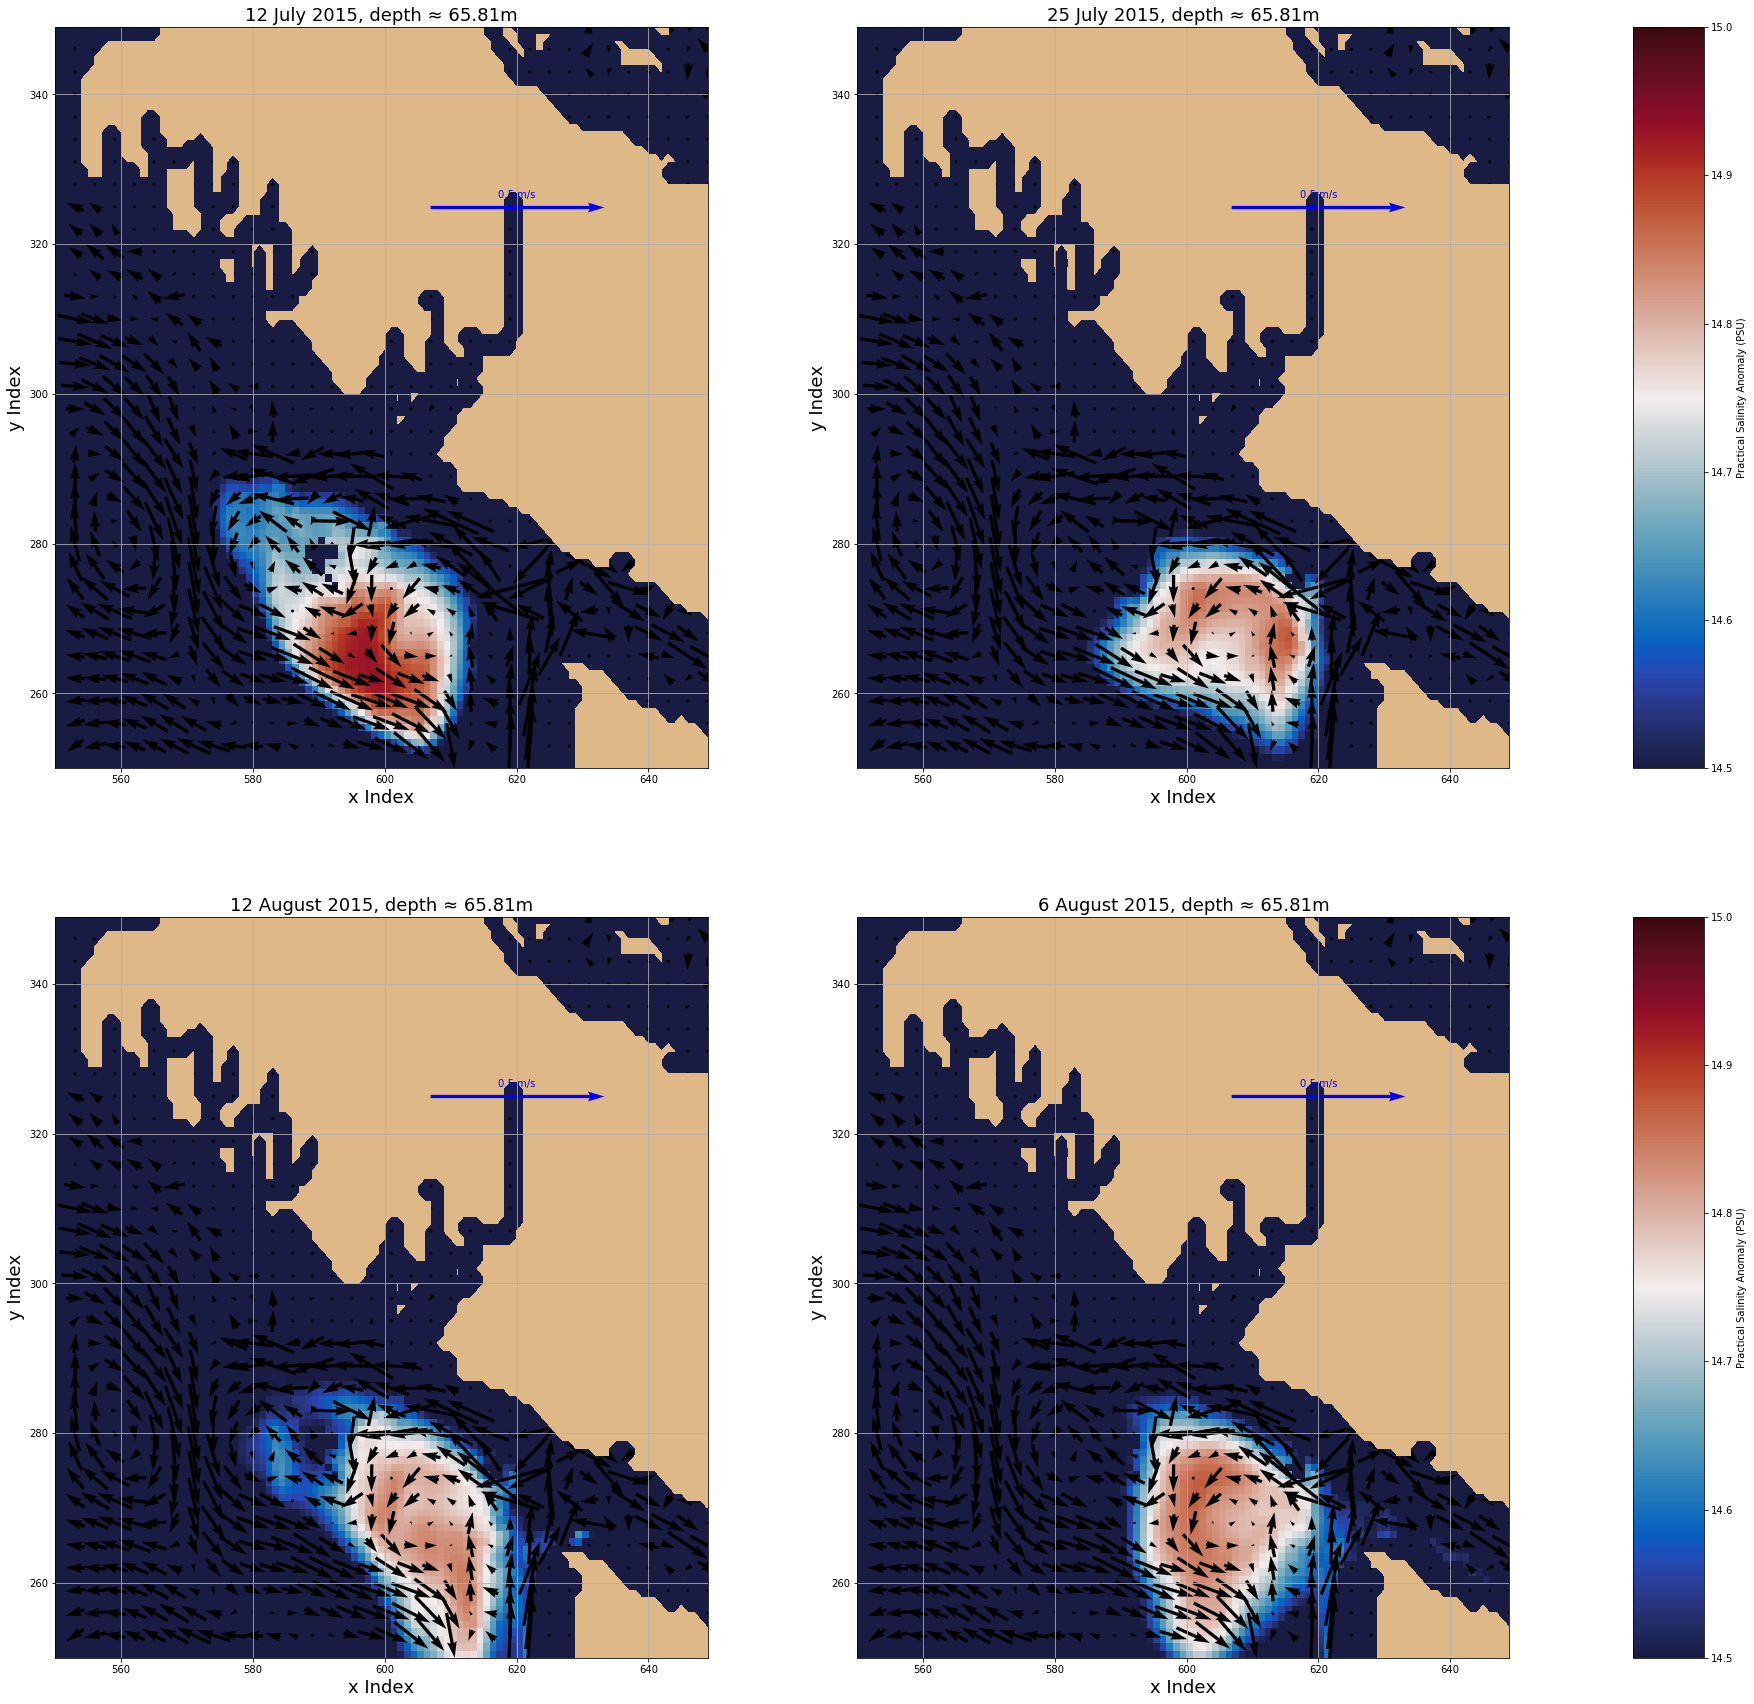

In [42]:
t_aug = 6
t_jul = 25
t = 12
level = 19


arrow_step = 3
y_slice_a = y_wcvi_slice[::arrow_step]
x_slice_a = x_wcvi_slice[::arrow_step]
cmap = plt.get_cmap(cmo.cm.haline)
cmap.set_bad('burlywood')

import matplotlib as mpl

norm = mpl.colors.Normalize(vmin=-1,vmax=0)

fig, axs = plt.subplots(2, 3, figsize=(30, 30), gridspec_kw={'width_ratios': [10, 10, 1]})

# Set up the figure and axes
# fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(12, 8))
land_colour = 'burlywood'
# for ax in (axl, axr):
#     ax.set_axis_bgcolor(land_colour)
# axl.set_position((0.125, 0.125, 0.6, 0.775))
# axcb.set_position((0.73, 0.125, 0.02, 0.775))
# axr.set_position((0.83, 0.125, 1.3, 0.775))

# Plot 24h average salinity at all depths along thalweg line
# viz_tools.set_aspect(axs[0])
cmap = plt.get_cmap(cmo.cm.balance)
cmap.set_bad(land_colour)


viz_tools.set_aspect(axs[0,0])
mesh = axs[0,0].pcolormesh(x_wcvi_slice,y_wcvi_slice,sal_july[t,level,250:350,550:650]- np.nanmean(sal_july[t,level,...]), cmap=cmap, vmin=14.5, vmax=15)
# mesh = ax.pcolormesh(x_wcvi_slice,y_wcvi_slice,temp_july[0,0,250:350,550:650], cmap=cmap, vmin = 12, vmax = 15)
# cbar = fig.colorbar(mesh)
# cbar.set_label('Salinity Anomlay (PSU)')
viz_tools.plot_land_mask(axs[0,0], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')

u_tzyx, v_tzyx = viz_tools.unstagger(u_aug[t,level,250:350,550:650], v_aug[t,level,250:350,550:650])
speeds = np.sqrt(np.square(u_tzyx) + np.square(v_tzyx))
quiver = axs[0,0].quiver(x_slice_a[1:], y_slice_a[1:], u_tzyx[::3,::3], v_tzyx[::3,::3] ,pivot='mid', cmap='Reds', width=0.005)
viz_tools.plot_land_mask(axs[0,0], bathy , xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')



axs[0,0].grid()
# Axes label and title
# Axes limits and grid
axs[0,0].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[0,0].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[0,0].set_xlabel('x Index',fontsize=18)
axs[0,0].set_ylabel('y Index',fontsize=18)
axs[0,0].set_title('{0} July 2015, depth \u2248 {d:.2f}{z.units}'.format(t, d=zlevels[level], z=zlevels),fontsize=18)
axs[0,0].quiverkey(quiver, 620, 325, 0.5, '0.5 m/s', coordinates='data', color='blue', labelcolor='blue')



spic_0 = spic_jul[t_jul, level, :,:]
spic_tzyx = np.ma.masked_values(spic_0, 0)

viz_tools.set_aspect(axs[0,1])
mesh = axs[0,1].pcolormesh(x_wcvi_slice,y_wcvi_slice,sal_july[t_jul,level,250:350,550:650]- np.nanmean(sal_july[t_jul,level,...]), cmap=cmap, vmin=14.5, vmax=15)
# mesh = ax.pcolormesh(x_wcvi_slice,y_wcvi_slice,temp_july[0,0,250:350,550:650], cmap=cmap, vmin = 12, vmax = 15)
# cbar = fig.colorbar(mesh)
# cbar.set_label('Salinity Anomlay (PSU)')
viz_tools.plot_land_mask(axs[0,1], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')

u_tzyx, v_tzyx = viz_tools.unstagger(u_aug[t,level,250:350,550:650], v_aug[t,level,250:350,550:650])
speeds = np.sqrt(np.square(u_tzyx) + np.square(v_tzyx))
quiver = axs[0,1].quiver(x_slice_a[1:], y_slice_a[1:], u_tzyx[::3,::3], v_tzyx[::3,::3] ,pivot='mid', cmap='Reds', width=0.005)
viz_tools.plot_land_mask(axs[0,1], bathy , xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')



axs[0,1].grid()
# Axes label and title
# Axes limits and grid
axs[0,1].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[0,1].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[0,1].set_xlabel('x Index',fontsize=18)
axs[0,1].set_ylabel('y Index',fontsize=18)
axs[0,1].set_title('{0} July 2015, depth \u2248 {d:.2f}{z.units}'.format(t_jul, d=zlevels[level], z=zlevels),fontsize=18)
axs[0,1].quiverkey(quiver, 620, 325, 0.5, '0.5 m/s', coordinates='data', color='blue', labelcolor='blue')




cbar = plt.colorbar(mesh, cax=axs[0,2])
cbar.set_label('Practical Salinity Anomaly (PSU)')



spic_0 = spic_aug[t, level, :,:]
spic_tzyx = np.ma.masked_values(spic_0, 0)

viz_tools.set_aspect(axs[1,0])
mesh = axs[1,0].pcolormesh(x_wcvi_slice,y_wcvi_slice,sal_aug[t,level,250:350,550:650]- np.nanmean(sal_aug[t,level,...]), cmap=cmap, vmin=14.5, vmax=15)
# mesh = ax.pcolormesh(x_wcvi_slice,y_wcvi_slice,temp_july[0,0,250:350,550:650], cmap=cmap, vmin = 12, vmax = 15)
# cbar = fig.colorbar(mesh)
# cbar.set_label('Salinity Anomlay (PSU)')
viz_tools.plot_land_mask(axs[1,0], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')

u_tzyx, v_tzyx = viz_tools.unstagger(u_aug[t,level,250:350,550:650], v_aug[t,level,250:350,550:650])
speeds = np.sqrt(np.square(u_tzyx) + np.square(v_tzyx))
quiver = axs[1,0].quiver(x_slice_a[1:], y_slice_a[1:], u_tzyx[::3,::3], v_tzyx[::3,::3] ,pivot='mid', cmap='Reds', width=0.005)
viz_tools.plot_land_mask(axs[1,0], bathy , xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')



axs[1,0].grid()
# Axes label and title
# Axes limits and grid
axs[1,0].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[1,0].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[1,0].set_xlabel('x Index',fontsize=18)
axs[1,0].set_ylabel('y Index',fontsize=18)
axs[1,0].set_title('{0} August 2015, depth \u2248 {d:.2f}{z.units}'.format(t, d=zlevels[level], z=zlevels),fontsize=18)
axs[1,0].quiverkey(quiver, 620, 325, 0.5, '0.5 m/s', coordinates='data', color='blue', labelcolor='blue')



spic_0 = spic_aug[t_aug, level, :,:]
spic_tzyx = np.ma.masked_values(spic_0, 0)

viz_tools.set_aspect(axs[1,1])
mesh = axs[1,1].pcolormesh(x_wcvi_slice,y_wcvi_slice,sal_aug[t_aug,level,250:350,550:650]- np.nanmean(sal_aug[t_aug,level,...]), cmap=cmap, vmin=14.5, vmax=15)
# mesh = ax.pcolormesh(x_wcvi_slice,y_wcvi_slice,temp_july[0,0,250:350,550:650], cmap=cmap, vmin = 12, vmax = 15)
# cbar = fig.colorbar(mesh)
# cbar.set_label('Salinity Anomlay (PSU)')
viz_tools.plot_land_mask(axs[1,1], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')

u_tzyx, v_tzyx = viz_tools.unstagger(u_aug[t,level,250:350,550:650], v_aug[t,level,250:350,550:650])
speeds = np.sqrt(np.square(u_tzyx) + np.square(v_tzyx))
quiver = axs[1,1].quiver(x_slice_a[1:], y_slice_a[1:], u_tzyx[::3,::3], v_tzyx[::3,::3] ,pivot='mid', cmap='Reds', width=0.005)
viz_tools.plot_land_mask(axs[1,1], bathy , xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')



axs[1,1].grid()
# Axes label and title
# Axes limits and grid
axs[1,1].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[1,1].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[1,1].set_xlabel('x Index',fontsize=18)
axs[1,1].set_ylabel('y Index',fontsize=18)
axs[1,1].set_title('{0} August 2015, depth \u2248 {d:.2f}{z.units}'.format(t_aug, d=zlevels[level], z=zlevels),fontsize=18)
axs[1,1].quiverkey(quiver, 620, 325, 0.5, '0.5 m/s', coordinates='data', color='blue', labelcolor='blue')


cbar = plt.colorbar(mesh, cax=axs[1,2])
cbar.set_label('Practical Salinity Anomaly (PSU)')

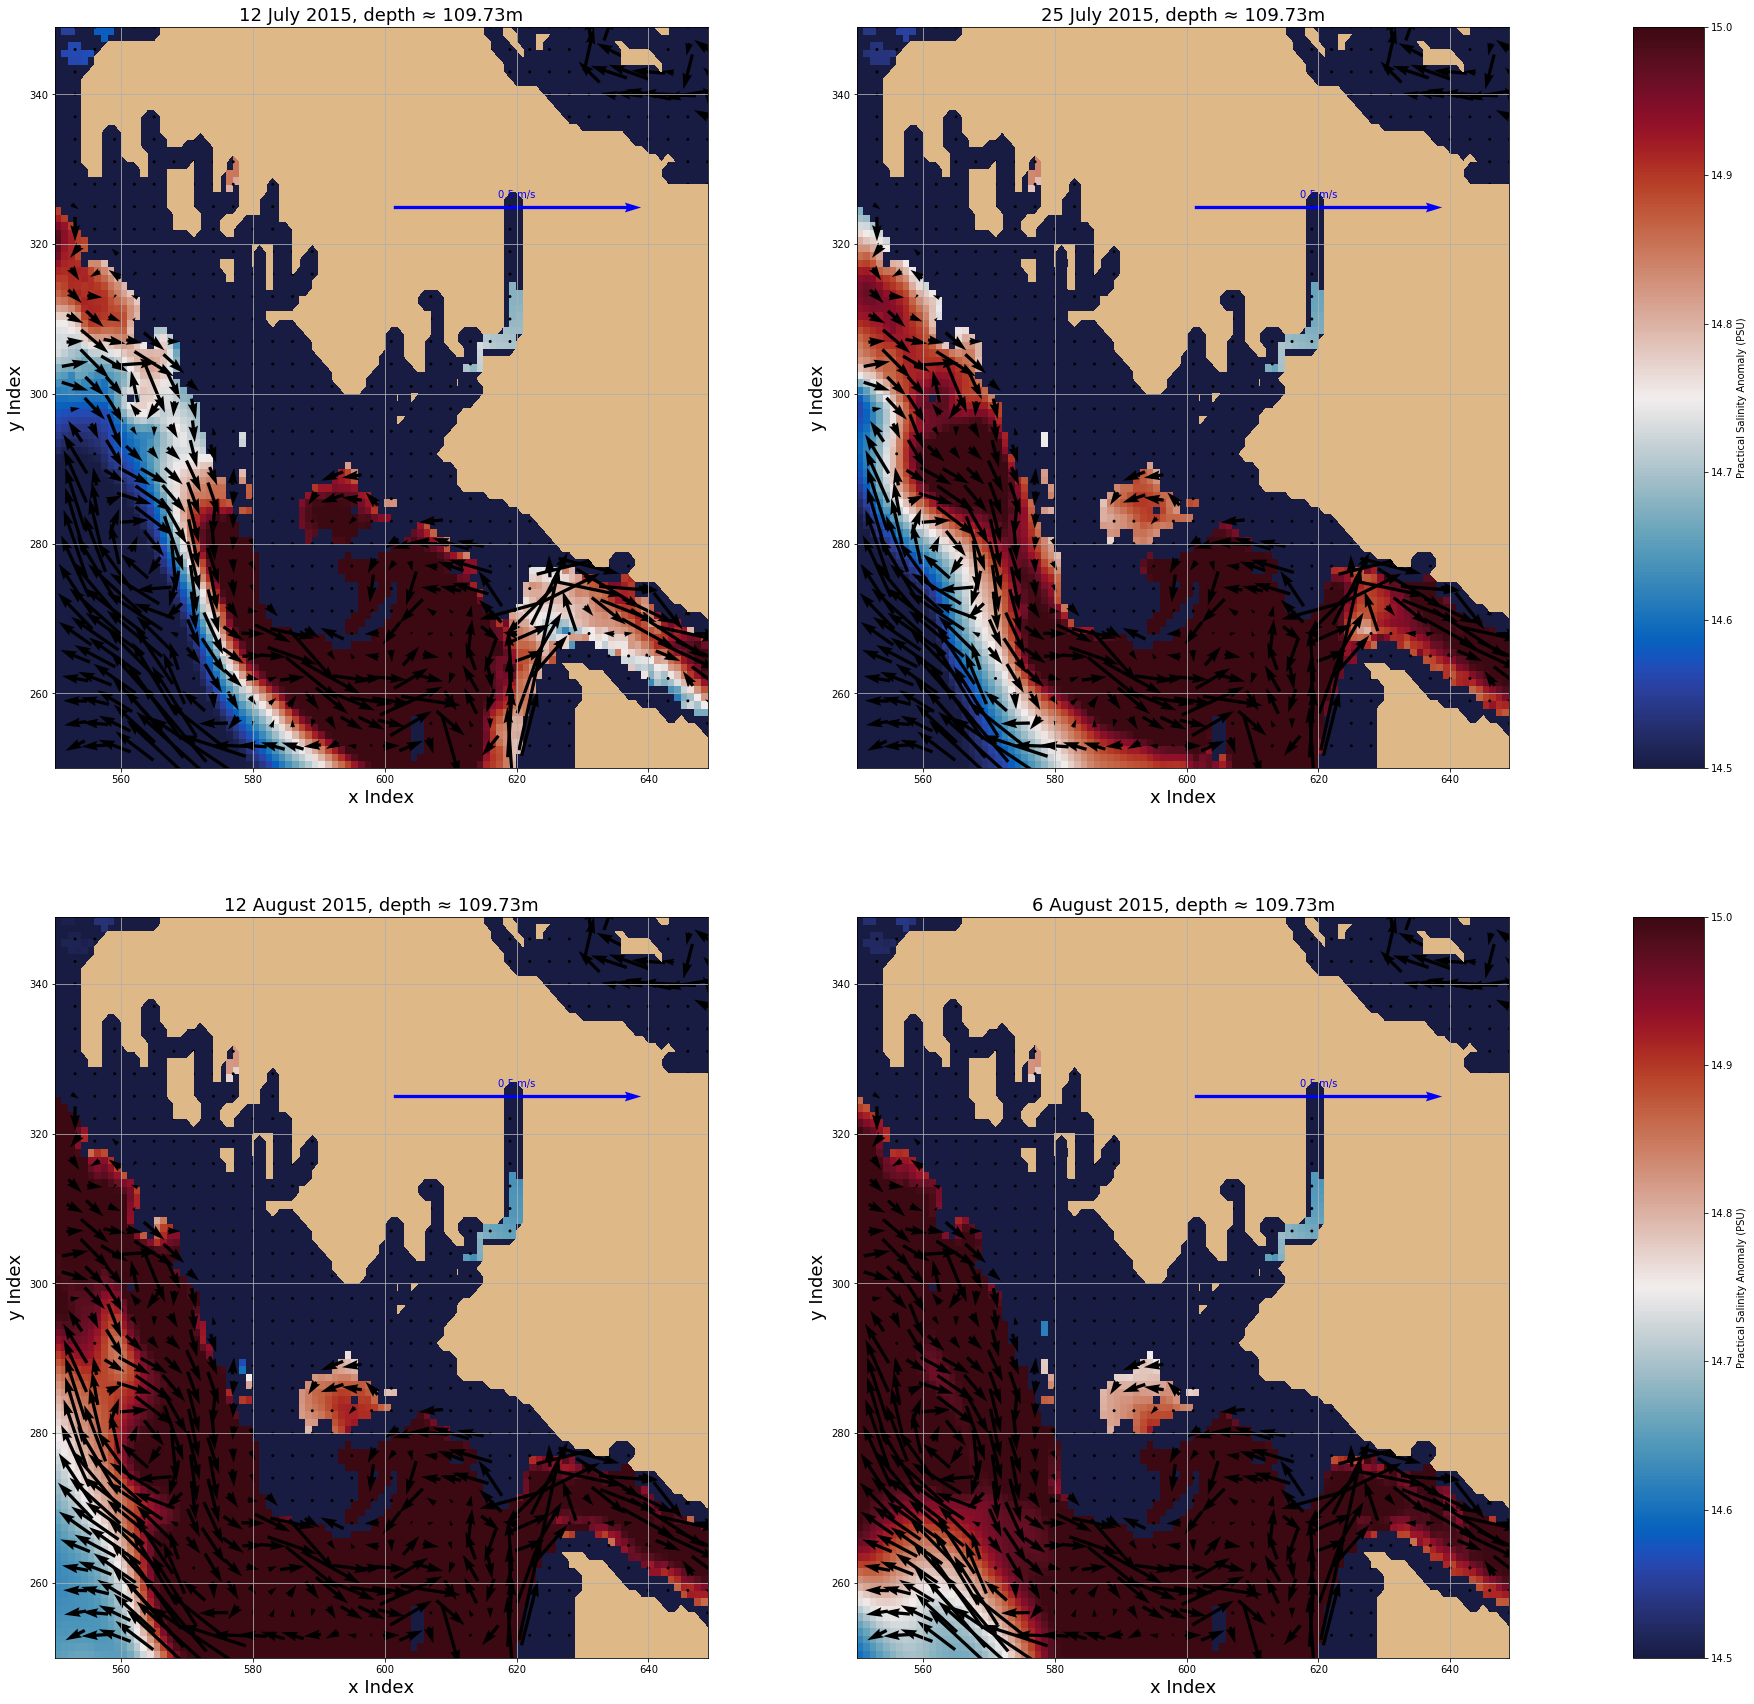

In [43]:
t_aug = 6
t_jul = 25
t = 12
level = 22


arrow_step = 3
y_slice_a = y_wcvi_slice[::arrow_step]
x_slice_a = x_wcvi_slice[::arrow_step]
cmap = plt.get_cmap(cmo.cm.haline)
cmap.set_bad('burlywood')

import matplotlib as mpl

norm = mpl.colors.Normalize(vmin=-1,vmax=0)

fig, axs = plt.subplots(2, 3, figsize=(30, 30), gridspec_kw={'width_ratios': [10, 10, 1]})

# Set up the figure and axes
# fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(12, 8))
land_colour = 'burlywood'
# for ax in (axl, axr):
#     ax.set_axis_bgcolor(land_colour)
# axl.set_position((0.125, 0.125, 0.6, 0.775))
# axcb.set_position((0.73, 0.125, 0.02, 0.775))
# axr.set_position((0.83, 0.125, 1.3, 0.775))

# Plot 24h average salinity at all depths along thalweg line
# viz_tools.set_aspect(axs[0])
cmap = plt.get_cmap(cmo.cm.balance)
cmap.set_bad(land_colour)


viz_tools.set_aspect(axs[0,0])
mesh = axs[0,0].pcolormesh(x_wcvi_slice,y_wcvi_slice,sal_july[t,level,250:350,550:650]- np.nanmean(sal_july[t,level,...]), cmap=cmap, vmin=14.5, vmax=15)
# mesh = ax.pcolormesh(x_wcvi_slice,y_wcvi_slice,temp_july[0,0,250:350,550:650], cmap=cmap, vmin = 12, vmax = 15)
# cbar = fig.colorbar(mesh)
# cbar.set_label('Salinity Anomlay (PSU)')
viz_tools.plot_land_mask(axs[0,0], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')

u_tzyx, v_tzyx = viz_tools.unstagger(u_aug[t,level,250:350,550:650], v_aug[t,level,250:350,550:650])
speeds = np.sqrt(np.square(u_tzyx) + np.square(v_tzyx))
quiver = axs[0,0].quiver(x_slice_a[1:], y_slice_a[1:], u_tzyx[::3,::3], v_tzyx[::3,::3] ,pivot='mid', cmap='Reds', width=0.005)
viz_tools.plot_land_mask(axs[0,0], bathy , xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')



axs[0,0].grid()
# Axes label and title
# Axes limits and grid
axs[0,0].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[0,0].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[0,0].set_xlabel('x Index',fontsize=18)
axs[0,0].set_ylabel('y Index',fontsize=18)
axs[0,0].set_title('{0} July 2015, depth \u2248 {d:.2f}{z.units}'.format(t, d=zlevels[level], z=zlevels),fontsize=18)
axs[0,0].quiverkey(quiver, 620, 325, 0.5, '0.5 m/s', coordinates='data', color='blue', labelcolor='blue')



spic_0 = spic_jul[t_jul, level, :,:]
spic_tzyx = np.ma.masked_values(spic_0, 0)

viz_tools.set_aspect(axs[0,1])
mesh = axs[0,1].pcolormesh(x_wcvi_slice,y_wcvi_slice,sal_july[t_jul,level,250:350,550:650]- np.nanmean(sal_july[t_jul,level,...]), cmap=cmap, vmin=14.5, vmax=15)
# mesh = ax.pcolormesh(x_wcvi_slice,y_wcvi_slice,temp_july[0,0,250:350,550:650], cmap=cmap, vmin = 12, vmax = 15)
# cbar = fig.colorbar(mesh)
# cbar.set_label('Salinity Anomlay (PSU)')
viz_tools.plot_land_mask(axs[0,1], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')

u_tzyx, v_tzyx = viz_tools.unstagger(u_aug[t,level,250:350,550:650], v_aug[t,level,250:350,550:650])
speeds = np.sqrt(np.square(u_tzyx) + np.square(v_tzyx))
quiver = axs[0,1].quiver(x_slice_a[1:], y_slice_a[1:], u_tzyx[::3,::3], v_tzyx[::3,::3] ,pivot='mid', cmap='Reds', width=0.005)
viz_tools.plot_land_mask(axs[0,1], bathy , xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')



axs[0,1].grid()
# Axes label and title
# Axes limits and grid
axs[0,1].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[0,1].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[0,1].set_xlabel('x Index',fontsize=18)
axs[0,1].set_ylabel('y Index',fontsize=18)
axs[0,1].set_title('{0} July 2015, depth \u2248 {d:.2f}{z.units}'.format(t_jul, d=zlevels[level], z=zlevels),fontsize=18)
axs[0,1].quiverkey(quiver, 620, 325, 0.5, '0.5 m/s', coordinates='data', color='blue', labelcolor='blue')




cbar = plt.colorbar(mesh, cax=axs[0,2])
cbar.set_label('Practical Salinity Anomaly (PSU)')



spic_0 = spic_aug[t, level, :,:]
spic_tzyx = np.ma.masked_values(spic_0, 0)

viz_tools.set_aspect(axs[1,0])
mesh = axs[1,0].pcolormesh(x_wcvi_slice,y_wcvi_slice,sal_aug[t,level,250:350,550:650]- np.nanmean(sal_aug[t,level,...]), cmap=cmap, vmin=14.5, vmax=15)
# mesh = ax.pcolormesh(x_wcvi_slice,y_wcvi_slice,temp_july[0,0,250:350,550:650], cmap=cmap, vmin = 12, vmax = 15)
# cbar = fig.colorbar(mesh)
# cbar.set_label('Salinity Anomlay (PSU)')
viz_tools.plot_land_mask(axs[1,0], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')

u_tzyx, v_tzyx = viz_tools.unstagger(u_aug[t,level,250:350,550:650], v_aug[t,level,250:350,550:650])
speeds = np.sqrt(np.square(u_tzyx) + np.square(v_tzyx))
quiver = axs[1,0].quiver(x_slice_a[1:], y_slice_a[1:], u_tzyx[::3,::3], v_tzyx[::3,::3] ,pivot='mid', cmap='Reds', width=0.005)
viz_tools.plot_land_mask(axs[1,0], bathy , xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')



axs[1,0].grid()
# Axes label and title
# Axes limits and grid
axs[1,0].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[1,0].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[1,0].set_xlabel('x Index',fontsize=18)
axs[1,0].set_ylabel('y Index',fontsize=18)
axs[1,0].set_title('{0} August 2015, depth \u2248 {d:.2f}{z.units}'.format(t, d=zlevels[level], z=zlevels),fontsize=18)
axs[1,0].quiverkey(quiver, 620, 325, 0.5, '0.5 m/s', coordinates='data', color='blue', labelcolor='blue')



spic_0 = spic_aug[t_aug, level, :,:]
spic_tzyx = np.ma.masked_values(spic_0, 0)

viz_tools.set_aspect(axs[1,1])
mesh = axs[1,1].pcolormesh(x_wcvi_slice,y_wcvi_slice,sal_aug[t_aug,level,250:350,550:650]- np.nanmean(sal_aug[t_aug,level,...]), cmap=cmap, vmin=14.5, vmax=15)
# mesh = ax.pcolormesh(x_wcvi_slice,y_wcvi_slice,temp_july[0,0,250:350,550:650], cmap=cmap, vmin = 12, vmax = 15)
# cbar = fig.colorbar(mesh)
# cbar.set_label('Salinity Anomlay (PSU)')
viz_tools.plot_land_mask(axs[1,1], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')

u_tzyx, v_tzyx = viz_tools.unstagger(u_aug[t,level,250:350,550:650], v_aug[t,level,250:350,550:650])
speeds = np.sqrt(np.square(u_tzyx) + np.square(v_tzyx))
quiver = axs[1,1].quiver(x_slice_a[1:], y_slice_a[1:], u_tzyx[::3,::3], v_tzyx[::3,::3] ,pivot='mid', cmap='Reds', width=0.005)
viz_tools.plot_land_mask(axs[1,1], bathy , xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')



axs[1,1].grid()
# Axes label and title
# Axes limits and grid
axs[1,1].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[1,1].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[1,1].set_xlabel('x Index',fontsize=18)
axs[1,1].set_ylabel('y Index',fontsize=18)
axs[1,1].set_title('{0} August 2015, depth \u2248 {d:.2f}{z.units}'.format(t_aug, d=zlevels[level], z=zlevels),fontsize=18)
axs[1,1].quiverkey(quiver, 620, 325, 0.5, '0.5 m/s', coordinates='data', color='blue', labelcolor='blue')


cbar = plt.colorbar(mesh, cax=axs[1,2])
cbar.set_label('Practical Salinity Anomaly (PSU)')

### Q) Do we see the eddy on or after 12th August ?

### Q) What happens on the LB station location (center of low oxygen Crawford and Pena, 2013)

### Q) Compare with spiciness of Falkor at the same location and see how they compare ?? Do a y (NEP036) vs x (Falkor) spiciness and see how they compare.

In [35]:
np.max(spic_jul)

1.2434534533191623

In [37]:
np.where(spic_jul == np.max(spic_jul))

(array([9]), array([0]), array([319]), array([589]))